# Exploratory Data Analysis of House Prices

- Ev Fiyatlari veri seti [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)'dan alinmistir.
- Hedef degisken: Satis Fiyati (SalePrice)

---
## ***Data Cleaning***
- Veri tipleri
- Eksik Degerler

### ***Veri tipleri***

- Veri tiplerini listele

In [14]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import missingno
# json dosyasina okuma yazma icin
import json
import math
# aykiri degerleri giderme icin
from scipy.stats.mstats import winsorize
# jb test icin
from scipy.stats import jarque_bera
from scipy.stats import normaltest
# ttesti ve anova icin
import scipy.stats as stats
# pca icin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# path ile calismak icin
import sys
# dosyanin bulundugu dizini path e ekledik
mylib = '/home/admin1/datascience/datascience/library'
if mylib not in sys.path:
    sys.path.insert(1, mylib)
# parser i kullanabilmek icin
from data_description_parser import data_description_house_prices
data_description_dict = data_description_house_prices()

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

# veri setini dataframe icerisine yukle
house_prices = pd.read_csv('data/train.csv')

print('\nHer bir degiskenin tipi:')
print('=======================================')
house_prices.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

- Surekli ve Kategorik degiskenleri belirle.

In [15]:
# object tipinde olmayan sutunlar surekli degiskenler listesine ayir
quantitative = [column for column in house_prices.columns if house_prices.dtypes[column] != 'object']

# id degiskeni ile ilgilenmiyoruz
quantitative.remove('Id')

print('\nSurekli degiskenler : \n', quantitative)

print('\nSurekli degiskenlerin unique deger sayilari  :\n')
for column in quantitative:
    print(column + ' :' , house_prices[column].nunique())

# object tipinde olanlar kategorik degiskenler listesine ayir
qualitative = [column for column in house_prices.columns if house_prices.dtypes[column] == 'object']

print('\nKategorik degiskenler : \n', qualitative)
          
print('\KAtegorik degiskenlerin unique deger sayilari  :\n')
for column in qualitative:
    print(column + ' :', house_prices[column].nunique())


Surekli degiskenler : 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Surekli degiskenlerin unique deger sayilari  :

MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 97
Gar

- Kategorik degiskenlerden surekli ozelligi gosteren yok (unique deger sayilari beklendigi gibi dusuk)

- Ancak surekli degiskenlerden unique deger sayisi 20 in altinda olanlari listeleyelim.

In [16]:
print('\nSurekli degiskenlerin unique deger sayisi 20 den az olanlar  :\n')
for column in quantitative:
    if house_prices[column].nunique() < 20:
        print(column + ' :' , house_prices[column].unique())


Surekli degiskenlerin unique deger sayisi 20 den az olanlar  :

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
BsmtFullBath : [1 0 2 3]
BsmtHalfBath : [0 1 2]
FullBath : [2 1 3 0]
HalfBath : [1 0 2]
BedroomAbvGr : [3 4 1 2 0 5 6 8]
KitchenAbvGr : [1 2 3 0]
TotRmsAbvGrd : [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces : [0 1 2 3]
GarageCars : [2 3 1 0 4]
PoolArea : [  0 512 648 576 555 480 519 738]
MoSold : [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold : [2008 2007 2006 2009 2010]


- Unique deger sayisi 20'nin altinda olanlar da surekli ozellikte.

### ***Eksik degerler***
- Eksik degerleri inceleme
    - Eksik degerleri donusturme
    - Eksik degerleri doldurma

#### ***Eksik degerleri inceleme***

In [17]:
print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
house_prices.isnull().mean()*100


Her bir degiskenin null deger oranlari  (%):


Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.767
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.548
MasVnrArea       0.548
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinSF1       0.000
BsmtFinType2     2.603
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.068
1stFlrSF   

- Yalnizca bir sutundan NA degere sahip satirlari cikarma (deneme amacli uygulandi)

In [18]:
# house_prices.dropna(subset=['Electrical'])

- Eksik degerlerin doldurmak icin uygun oldugu (eksik deger orani sifirdan buyuk %40 den kucuk) ve olmadigi (yaridan fazla eksik deger bulunan) degiskenler

In [19]:
# sutundaki eksik deger oraninin % 40 dan fazla oldugu sutunlar listesi
many_na_columns = [column for column in house_prices.columns if house_prices[column].isnull().mean() > 0.4]

# sutundaki eksik deger oraninin % 40 dan az oldugu sutunlar listesi
few_na_columns = [column for column in house_prices.columns if (house_prices[column].isnull().mean() < 0.4 and house_prices[column].isnull().mean() != 0)]

print('\nEksik degeri olan ve orani % 40 den az olan  degiskenler \n ', few_na_columns)
print('\nEksik deger orani % 40 den fazla olan degiskenler \n ', many_na_columns)



Eksik degeri olan ve orani % 40 den az olan  degiskenler 
  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Eksik deger orani % 40 den fazla olan degiskenler 
  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


- Eksik degerlerin sutun ve satirlar bazinda gorsellestirilmesinde 4 sutunun neredeyse bos oldugu goruluyor.

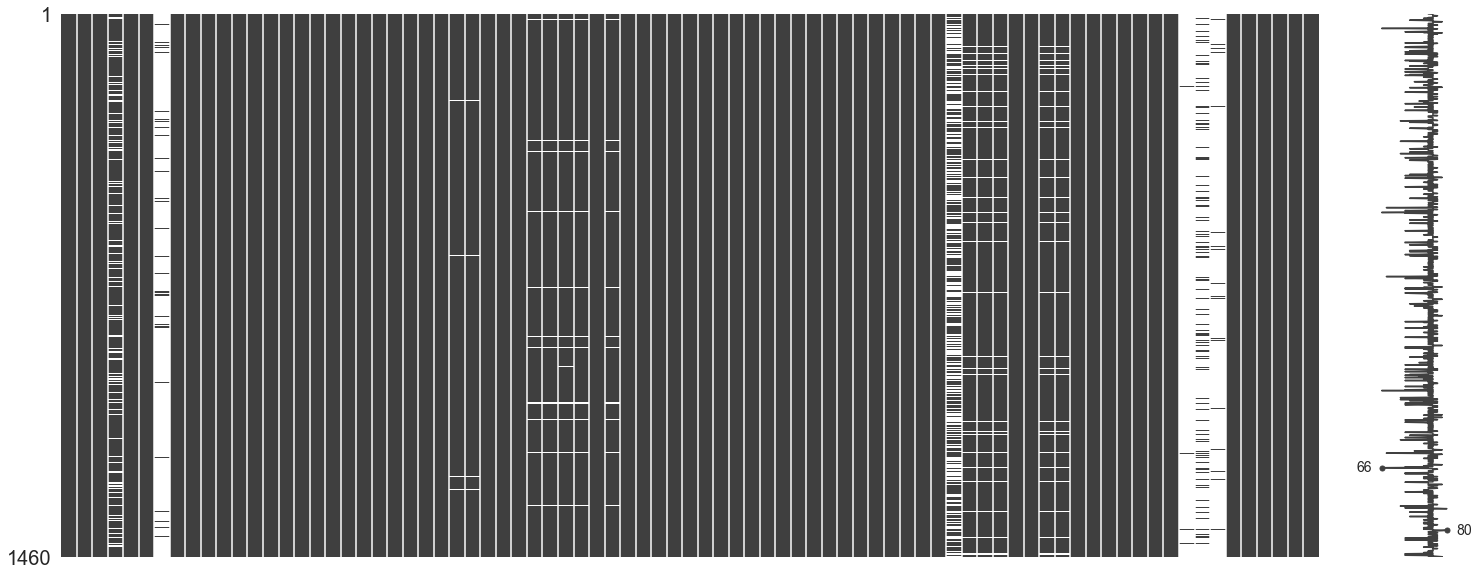

In [20]:
# missingno eksik sutunlari gorsellestirmeye yarar
missingno.matrix(house_prices)
plt.show()

- Eksik degerlerin bar grafigi

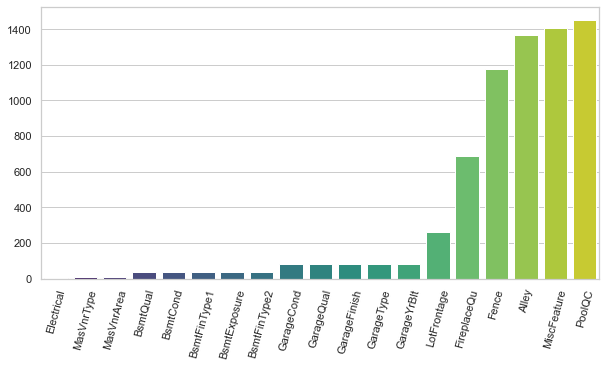

In [21]:
# null degerlerin toplamlarindan olusan seri
missing = house_prices.isnull().sum()

# where eksik degeri sifirdan buyukler icin null doner 
# dropna() ise bu null degerleri atar
missing = missing.where(lambda x : x>0).dropna()
# yukaridaki islemin kisa versiyonu  
# missing = missing[missing > 0]

# degerlere gore sirala
missing.sort_values(inplace=True)

# eksik degerler grafigi
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=75)
plt.show()

- Cok fazla eksik deger olan sutunlarda unique degerleri inceleyelim.

In [22]:
for column in many_na_columns:
    print(column + ' :', house_prices[column].unique())

Alley : [nan 'Grvl' 'Pave']
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC : [nan 'Ex' 'Fa' 'Gd']
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


- Degiskenler hakkinda aciklama dosyasini parse ettik(bknz: [parser](https://github.com/ahmetpergamum/datascience/blob/master/04_eda_project_house_prices/parse_data_description_file.ipynb)), istenen degiskenler hakkinda aciklamalara artik kolayca erisim saglayabiliriz.

In [23]:
# sozlugu (icice sozlukse) duzenli sekilde yazdiran fonksiyon
def prettyprint(d, columns=[], indent=0):
    if columns == []:
        columns = d.keys()
    for key, value in d.items():
        if key in columns:
            print(' ' * indent + str(key), end=': ')
            if isinstance(value, dict):
                prettyprint(value, indent=1)
            else:
                print(' ' * indent + str(value))

prettyprint(data_description_dict, many_na_columns)

- Bu degiskenlerin data description verisini inceledigimizde one-hot ya da integer encoding yapabilecegimiz degiskenler gorulebilir.
- PoolQC ve FireplaceQu degiskenleri, ordinal (siralama) oldugundan integer encoding uygulanabilir.
- Alley, Fence, MiscFeature degiskenleri ise nominal degiskenler oldugundan one hot encoding uygulanabilir.
- Bunlari modelleme asamasinda gerekirse uygulayabiliriz.
- Simdilik buradaki eksik degerleri 'None' degeri ile dolduruyoruz.

- Simdi de eksik degerleri az olan degiskenleri inceleyelim.

In [24]:
# unique degerleri inceleyelim
for column in few_na_columns:
    print(column + ' :', house_prices[column].unique())

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 

#### ***Eksik degerleri doldurma***

- Yukaridaki kodun ciktisi incelenerek degiskenlerin nasil doldurulabilecegine karar verildi.


- ***sifir degeri ile doldurulabilecek degiskenler***
    - LotFrontage
    - MasVnrArea

In [25]:
for column in ['LotFrontage', 'MasVnrArea']:
    house_prices[column].fillna(0, inplace=True)

- ***'None' string ifadesi ile doldurulacak degiskenler***

In [26]:
none_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
           'GarageFinish', 'GarageQual', 'GarageCond' ]
# fazla eksik degerlileri de bu sekilde dolduracagiz onlari da listeye ekledik
none_columns = none_columns + many_na_columns
prettyprint(data_description_dict, none_columns)

Alley:  description:  Type of alley access to property
 Grvl:  Gravel
 Pave:  Paved
 NA :  No alley access
MasVnrType:  description:  Masonry veneer type
 BrkCmn:  Brick Common
 BrkFace:  Brick Face
 CBlock:  Cinder Block
 None:  None
 Stone:  Stone
BsmtQual:  description:  Evaluates the height of the basement
 Ex:  Excellent (100+ inches)
 Gd:  Good (90-99 inches)
 TA:  Typical (80-89 inches)
 Fa:  Fair (70-79 inches)
 Po:  Poor (<70 inches
 NA:  No Basement
BsmtCond:  description:  Evaluates the general condition of the basement
 Ex:  Excellent
 Gd:  Good
 TA:  Typical - slight dampness allowed
 Fa:  Fair - dampness or some cracking or settling
 Po:  Poor - Severe cracking, settling, or wetness
 NA:  No Basement
BsmtExposure:  description:  Refers to walkout or garden level walls
 Gd:  Good Exposure
 Av:  Average Exposure (split levels or foyers typically score average or above)
 Mn:  Mimimum Exposure
 No:  No Exposure
 NA:  No Basement
BsmtFinType1:  description:  Rating of basement

In [27]:
for column in none_columns:
    house_prices[column].fillna('None', inplace=True)

- ***o sutunda en cok bulunan deger (mod) ile doldurulacak degiskenler***
    - GarageYrBlt icin en cok bulunan deger 2005
    - Electrical: 'SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan , en cok bulunan deger 'SBrkr'

In [28]:
for column in ['GarageYrBlt','Electrical']:
    # GarageYrBlt ve Electrical en sik gecen mod degeri ile dolduruldu
    house_prices[column].fillna(house_prices[column].mode()[0], inplace=True)

In [29]:
# index=False parametresi csv ye yazarken yeniden indeks olusturmamasini soyler
house_prices.to_csv('data/house_prices_clean.csv', index=False)
house_prices.isnull().mean()*100

Id              0.000
MSSubClass      0.000
MSZoning        0.000
LotFrontage     0.000
LotArea         0.000
Street          0.000
Alley           0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.000
MasVnrArea      0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinSF1      0.000
BsmtFinType2    0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFin

Eksik degerler dolduruldu sira geldi aykiri degerlere.

---
## ***Outlier Tespiti***

- Gorsellestirme - Boxplotting
- z score
- IQR score (Tukey yontemi)

***Gorsellestirme yontemi***
- Boxplot grafigi ile degiskenler gozlemlenir
    - Burada sureklilik ozelligi gosteren degiskenleri inceledik

In [30]:
# eksik degerlerin dolduruldugu verileri clean df ine atalim
house_prices_clean = house_prices.copy()

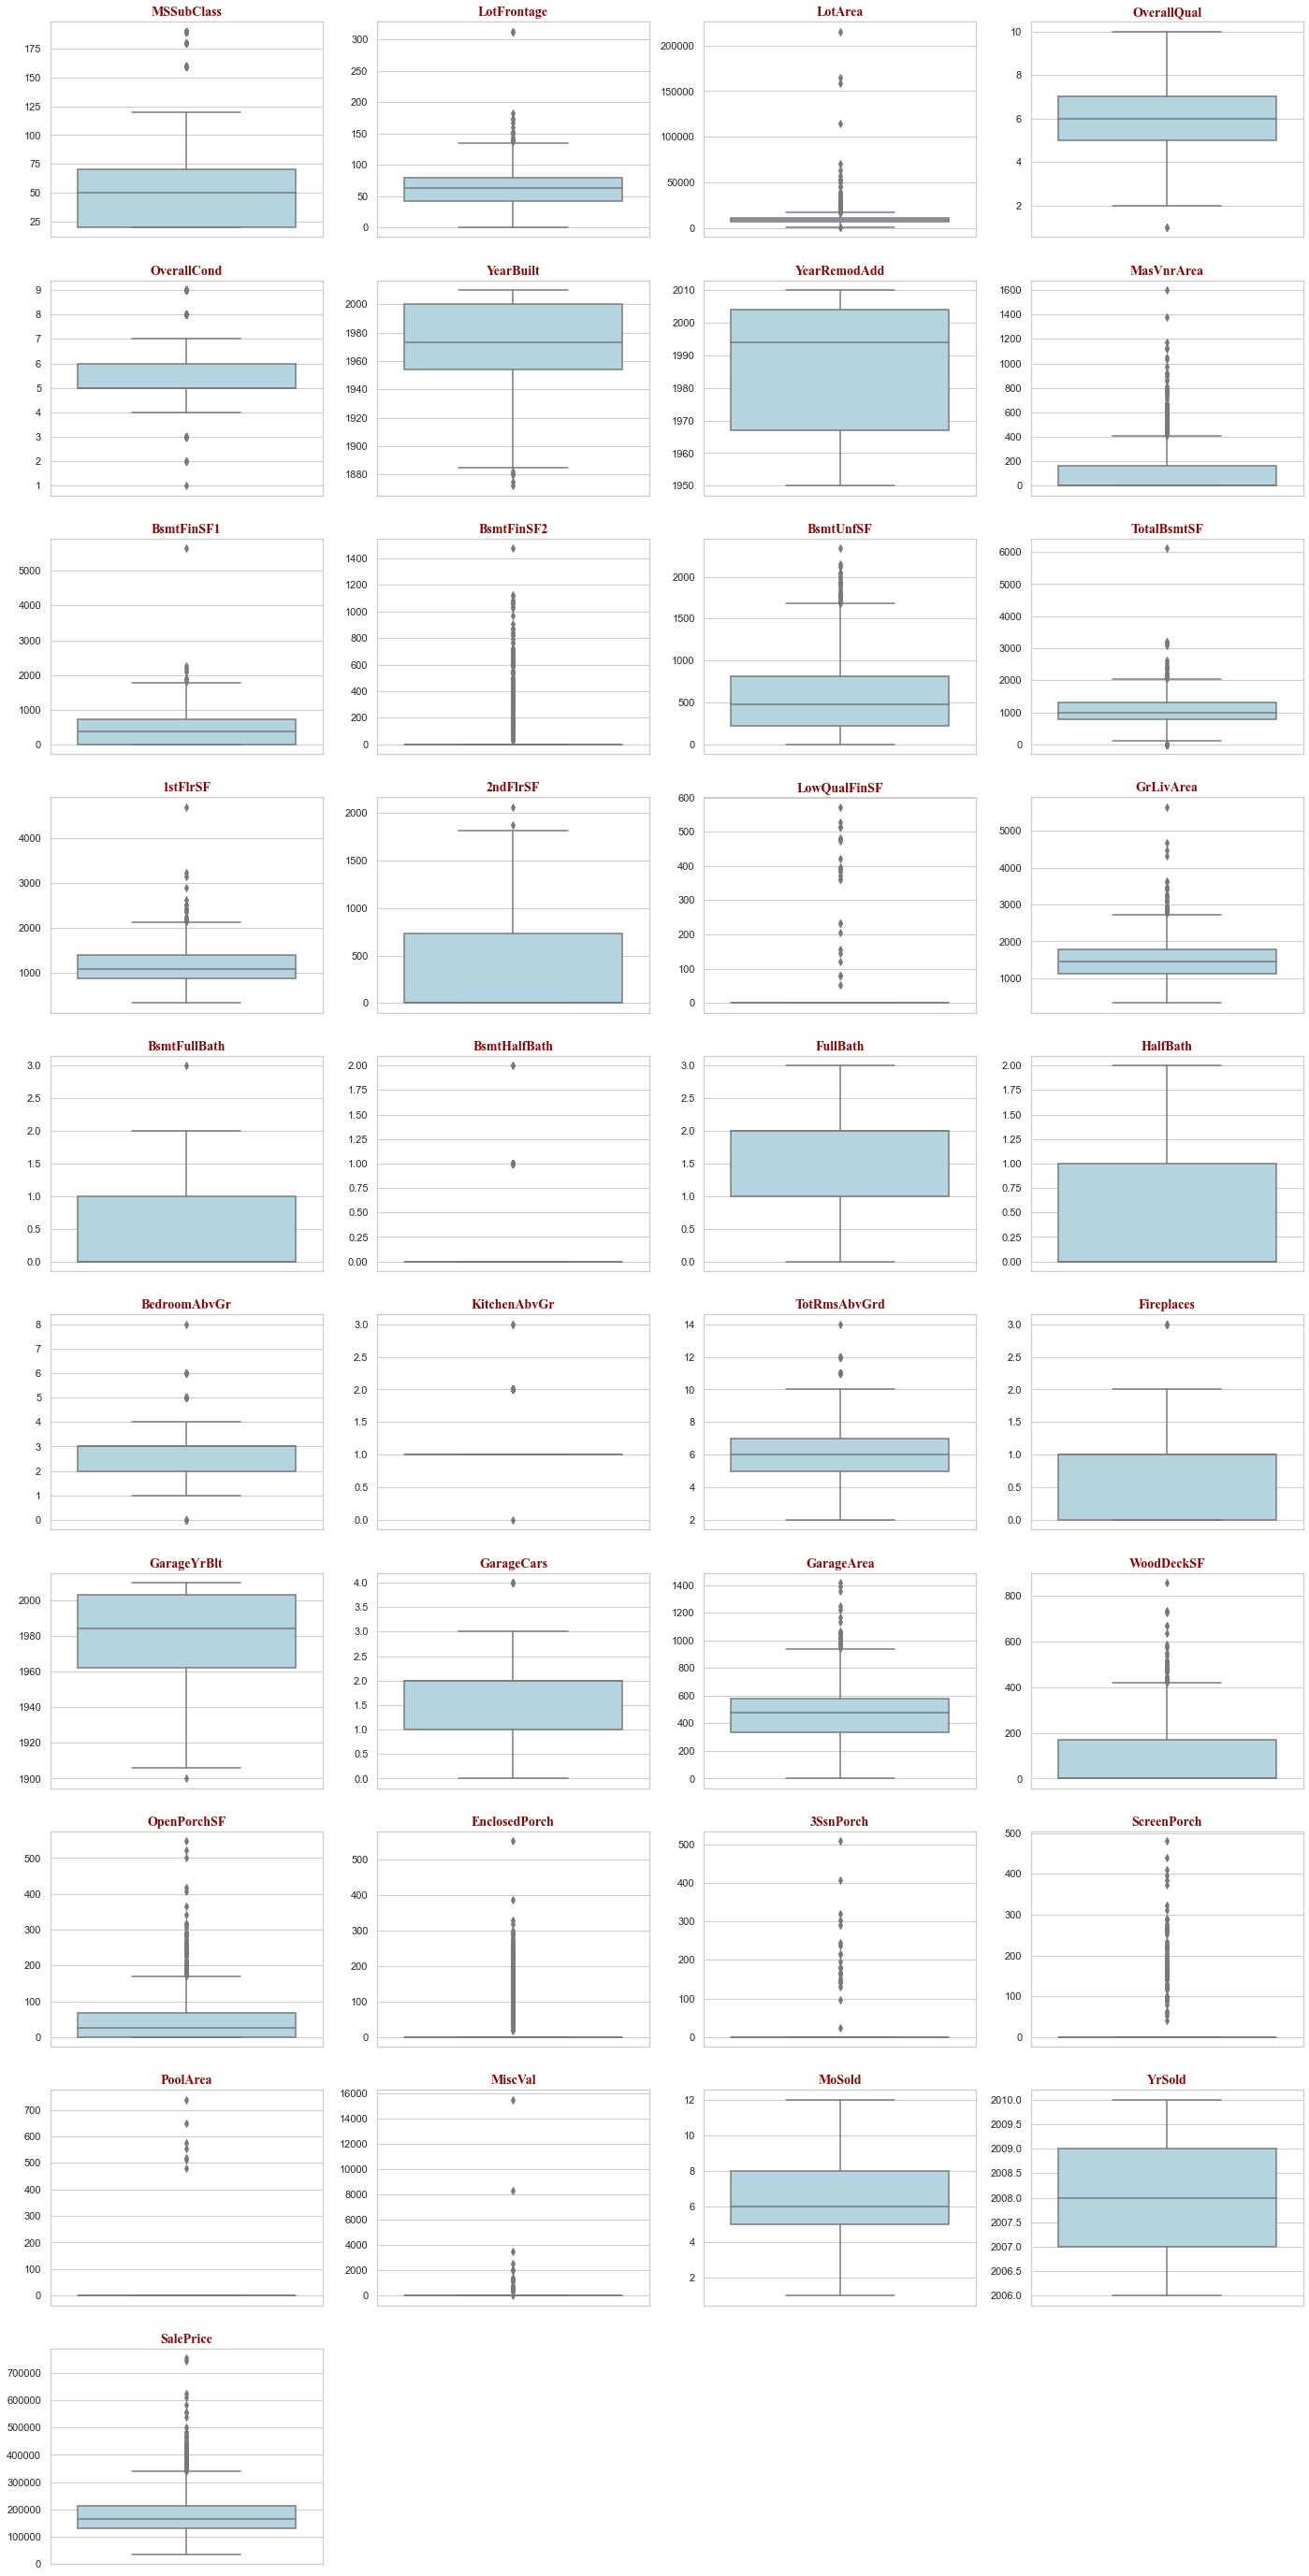

In [31]:
# her satir icin cizilecek grafik
column_n = 4
# satir sayisini hesaplama
row_n = np.ceil(len(quantitative)/column_n)
# satir ve sutun sayisindan grafik boyutu hesabi
plt.figure(figsize=(6 * column_n, 5 * row_n ))


for i, column in enumerate(quantitative):
    plt.subplot(row_n,column_n,i+1)
    ax = sns.boxplot(y=house_prices_clean[column], color='lightblue')
    ax.set(ylabel='')
    plt.title(column, fontdict=title_font)

plt.show()

***Aykiri degerleri giderme***
- Sadece en cok korele olan 5 degisken icin uygulandi.

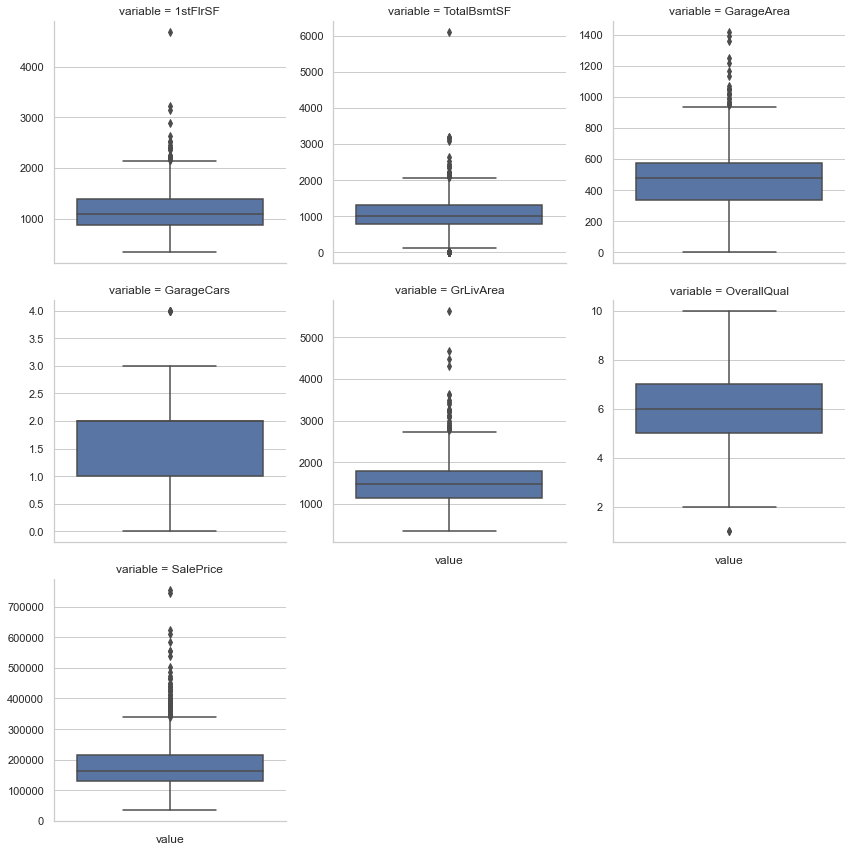

In [32]:
mostly_corr = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'GrLivArea', 'OverallQual']
# varsayilan olarak x degeri alan boxplot icin y parametresine deger girildi
def boxplot(y, **kwargs):
    sns.boxplot(y=y)

# outliers icin ayri bir liste olusturduk
outliers = mostly_corr + ['SalePrice']
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=outliers)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(boxplot, "value" )

- Burada satis fiyati 400000 den buyuk evlerin winsorize edilmesi uygun olmayabilir, bunun yerine yuksek fiyatli evler ayri degerlendirilebilir.

***z score yontemi***

TODO

***Tukey yontemi***

TODO

---
## ***Tek Degiskenli Analiz***

- Veri hakkinda genel bilgiler
- Dagilimlarin incelenmesi

- ***Veri hakkinda genel bilgiler***

In [33]:
print('\nDataframe genel yapisi: \n')
display(house_prices_clean.head())
#print('\nDegiskenerin veri tipleri: \n')
#print(house_prices_clean.info())
print('\nTanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :\n')
display(house_prices_clean.describe())


Dataframe genel yapisi: 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave  None      Reg   
1   2          20       RL       80.000     9600   Pave  None      Reg   
2   3          60       RL       68.000    11250   Pave  None      IR1   
3   4          70       RL       60.000     9550   Pave  None      IR1   
4   5          60       RL       84.000    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            


Tanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :



Id  MSSubClass  LotFrontage     LotArea  OverallQual  \
count 1,460.000   1,460.000    1,460.000   1,460.000    1,460.000   
mean    730.500      56.897       57.623  10,516.828        6.099   
std     421.610      42.301       34.664   9,981.265        1.383   
min       1.000      20.000        0.000   1,300.000        1.000   
25%     365.750      20.000       42.000   7,553.500        5.000   
50%     730.500      50.000       63.000   9,478.500        6.000   
75%   1,095.250      70.000       79.000  11,601.500        7.000   
max   1,460.000     190.000      313.000 215,245.000       10.000   

       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count    1,460.000  1,460.000     1,460.000   1,460.000   1,460.000   
mean         5.575  1,971.268     1,984.866     103.117     443.640   
std          1.113     30.203        20.645     180.731     456.098   
min          1.000  1,872.000     1,950.000       0.000       0.000   
25%          5.000  1,954.000     1,967.000       0.000       0.000   
50%          5.000  1,973.000     1,994.000       0.000     383.500   
75%          6.000  2,000.000     2,004.000     164.250     712.250   
max          9.000  2,010.000     2,010.000   1,600.000   5,644.000   

       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
count   1,460.000  1,460.000    1,460.000 1,460.000 1,460.000     1,460.000   
mean       46.549    567.240    1,057.429 1,162.627   346.992         5.845   
std       161.319    441.867      438.705   386.588   436.528        48.623   
min         0.000      0.000        0.000   334.000     0.000         0.000   
25%         0.000    223.000      795.750   882.000     0.000         0.000   
50%         0.000    477.500      991.500 1,087.000     0.000         0.000   
75%         0.000    808.000    1,298.250 1,391.250   728.000         0.000   
max     1,474.000  2,336.000    6,110.000 4,692.000 2,065.000       572.000   

       GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
count  1,460.000     1,460.000     1,460.000 1,460.000 1,460.000   
mean   1,515.464         0.425         0.058     1.565     0.383   
std      525.480         0.519         0.239     0.551     0.503   
min      334.000         0.000         0.000     0.000     0.000   
25%    1,129.500         0.000         0.000     1.000     0.000   
50%    1,464.000         0.000         0.000     2.000     0.000   
75%    1,776.750         1.000         0.000     2.000     1.000   
max    5,642.000         3.000         2.000     3.000     2.000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count     1,460.000     1,460.000     1,460.000   1,460.000    1,460.000   
mean          2.866         1.047         6.518       0.613    1,979.976   
std           0.816         0.220         1.625       0.645       24.750   
min           0.000         0.000         2.000       0.000    1,900.000   
25%           2.000         1.000         5.000       0.000    1,962.000   
50%           3.000         1.000         6.000       1.000    1,984.500   
75%           3.000         1.000         7.000       1.000    2,003.000   
max           8.000         3.000        14.000       3.000    2,010.000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1,460.000   1,460.000   1,460.000    1,460.000      1,460.000   
mean        1.767     472.980      94.245       46.660         21.954   
std         0.747     213.805     125.339       66.256         61.119   
min         0.000       0.000       0.000        0.000          0.000   
25%         1.000     334.500       0.000        0.000          0.000   
50%         2.000     480.000       0.000       25.000          0.000   
75%         2.000     576.000     168.000       68.000          0.000   
max         4.000   1,418.000     857.000      547.000        552.000   

       3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold    YrSold  \
count  1,

- ***Dagilimlarin incelenmesi***

Surekli degiskenler icin dagilimlar incelenir

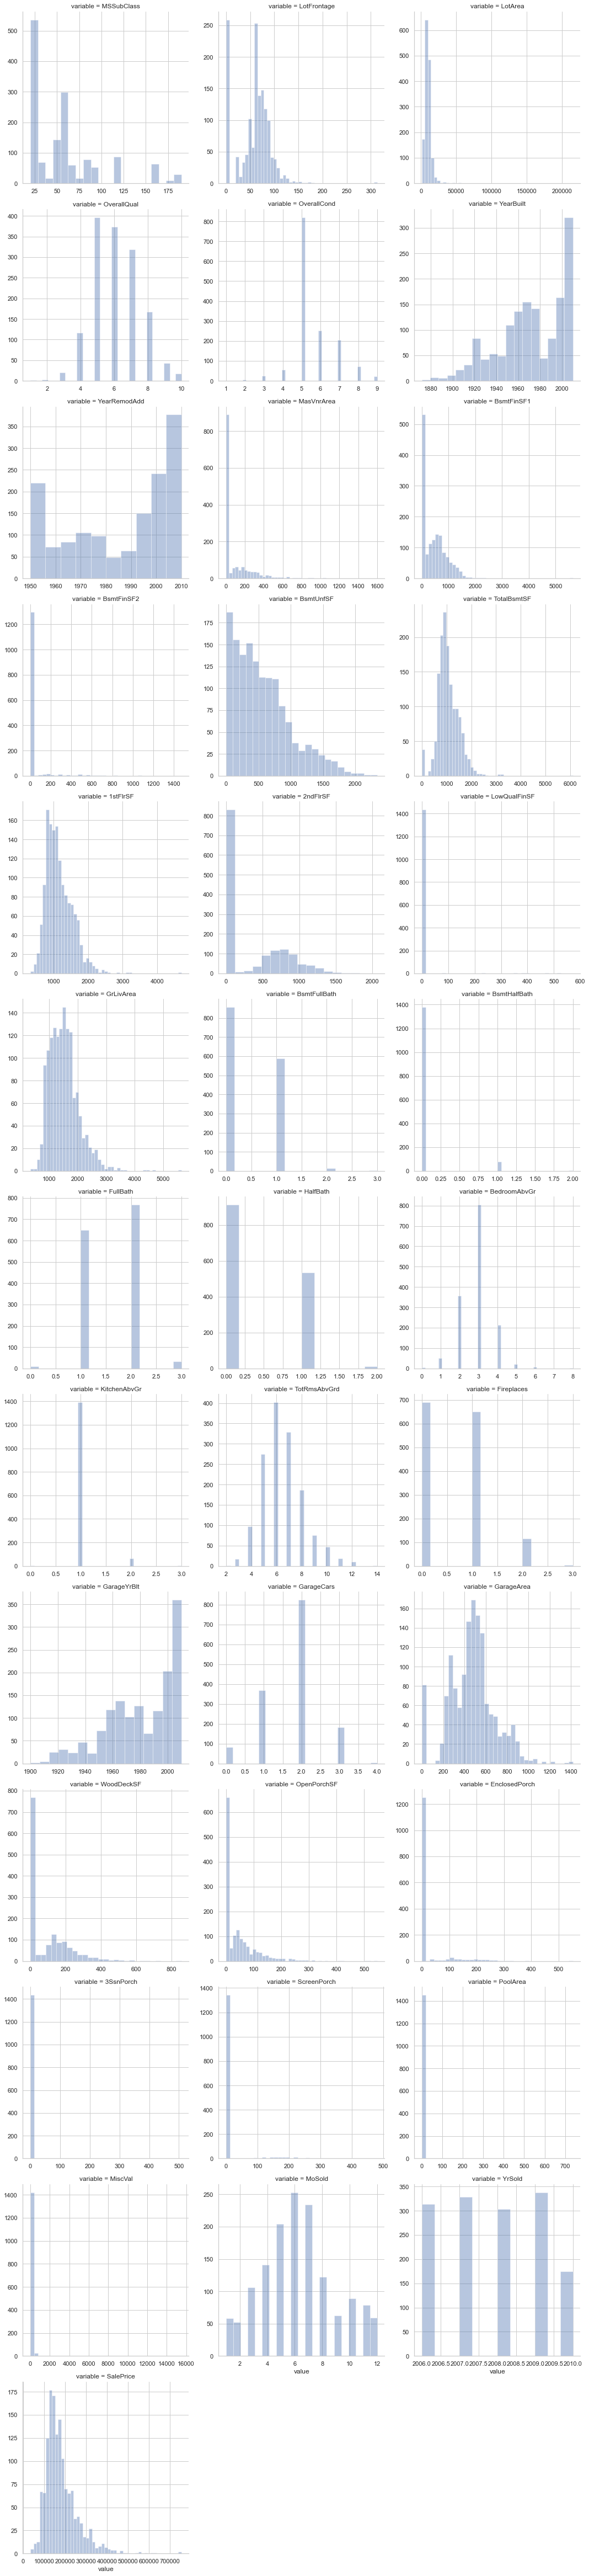

In [34]:
# distplot fonksiyonu tanimlandi
# kde parametresi False olarak tanimlandi
def distplot(x, **kwargs):
    sns.distplot(x, kde=False)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=quantitative)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.distplot, "value", kde=False )


- Dagilim grafikleri incelendiginde log alinarak normalize edilebilecek degiskenler oldugu gorulmektedir.

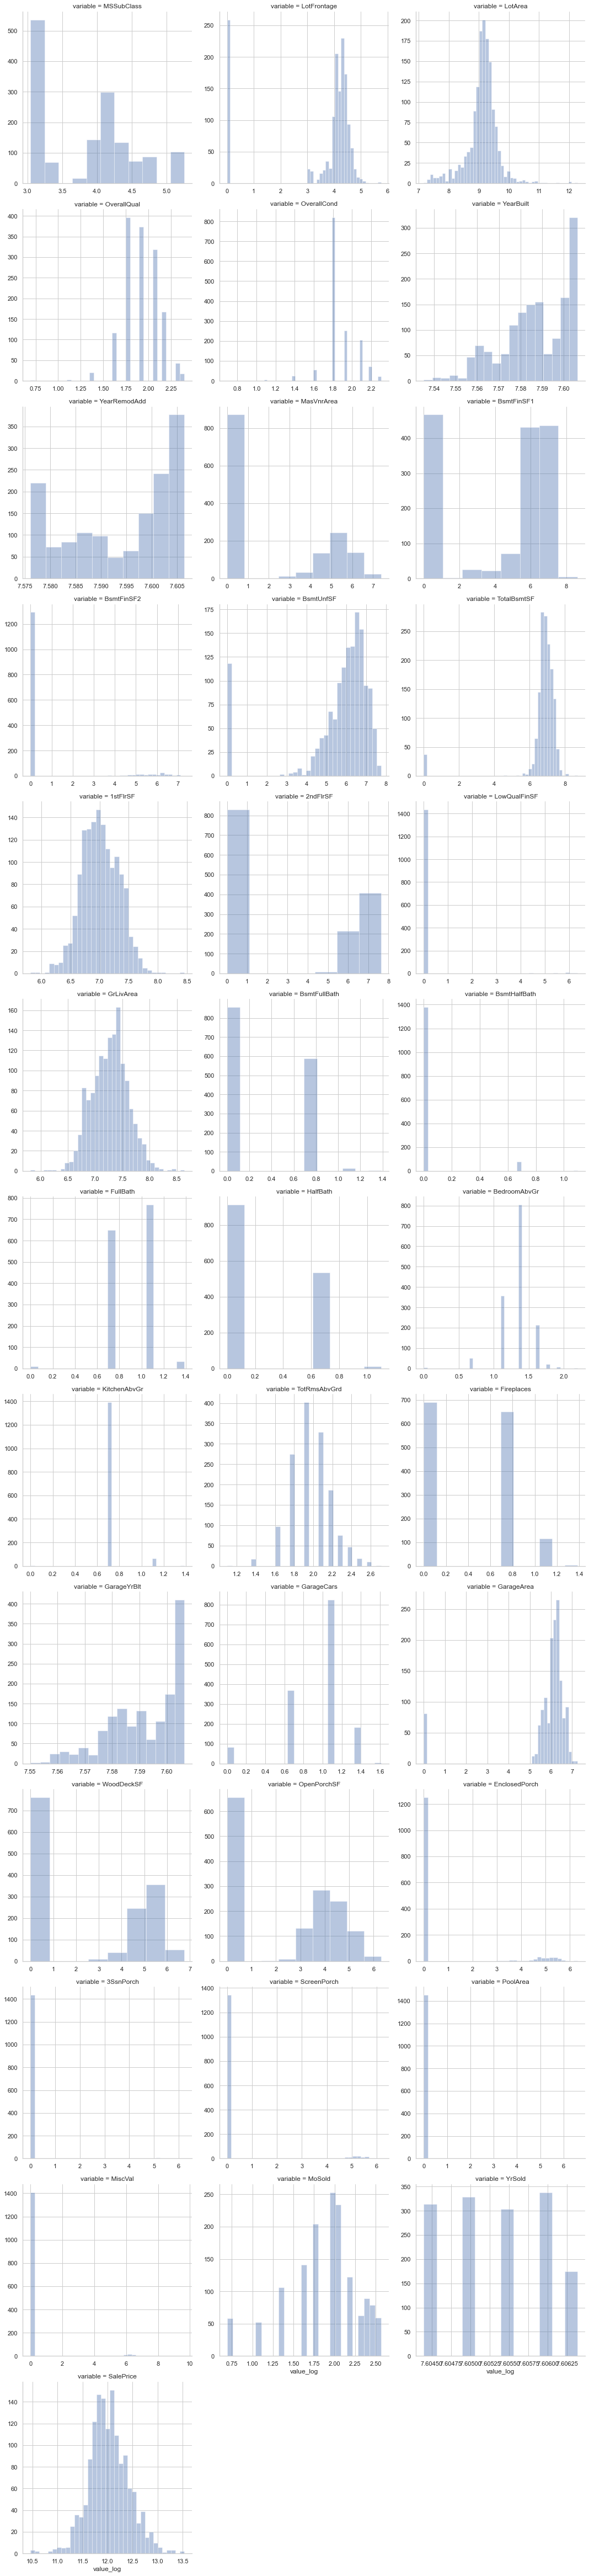

In [35]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=quantitative)

# log alindiginde sonsuz hatasi almamak icin sifir degeri degistirildi
#f.replace(to_replace=0, value=0.1,inplace=True)
# degerlerin log alinarak ayri bir sutun olusturuldu
f['value_log'] = np.log(f['value']+1)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
# logu alinmis degerler cizdirildi
g = g.map(sns.distplot, "value_log", kde=False )

- LotArea, 1stFLrSF, GrLivArea ve SalePrice log alinarak normale yakin hale girilmis oldu.

***JB Test***

- Dagilimlari normallik testine tabi tutariz.
- Asagidaki jarque-bera (JB) testinde p value 0.05 ten kucuk ciktigindan normal dagilim olmadigi anlasilmaktadir.

In [36]:
# to display specified number of digits 
pd.options.display.float_format = '{:.5f}'.format
# Jarque-Bera test fonksiyonu
# ilk parametre dataframe, ikinci parametre test edilen df sutunlari 
def jbtest(df, columns):
    distribution_tests = pd.DataFrame(columns=['feature', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                             'normal_stats', 'normal_p_value'])
    for column in columns:
        jb_stats = jarque_bera(df[column])
        norm_stats = normaltest(df[column])
        distribution_tests = distribution_tests.append({"feature": column,
                                                    "jarque_bera_stats" : jb_stats[0] ,
                                                    "jarque_bera_p_value" : jb_stats[1] ,
                                                    "normal_stats": norm_stats[0] , 
                                                    "normal_p_value" : norm_stats[1]
                                                   }, ignore_index=True)
    display(distribution_tests)
    
    
jb_columns = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

jbtest(house_prices_clean, jb_columns)

feature  jarque_bera_stats  jarque_bera_p_value  normal_stats  \
0    LotArea      2531814.83183              0.00000    2590.59187   
1   1stFlrSF         2452.09517              0.00000     461.00674   
2  GrLivArea         1898.79508              0.00000     437.12026   
3  SalePrice         3438.87212              0.00000     610.83591   

   normal_p_value  
0         0.00000  
1         0.00000  
2         0.00000  
3         0.00000

---
## ***Cok degiskenli analiz***

***Surekli-Kategorik degisken analizi***
- Hedef degiskenimiz satis fiyati (sale price)
- Hedef degiskenle (surekli), kategorik degiskenlerimizi bar grafigi ile analiz edebiliriz.

- Facetgrid ile hizli sekilde barplot cizebiliriz ancak burada siralama yapilamadi.

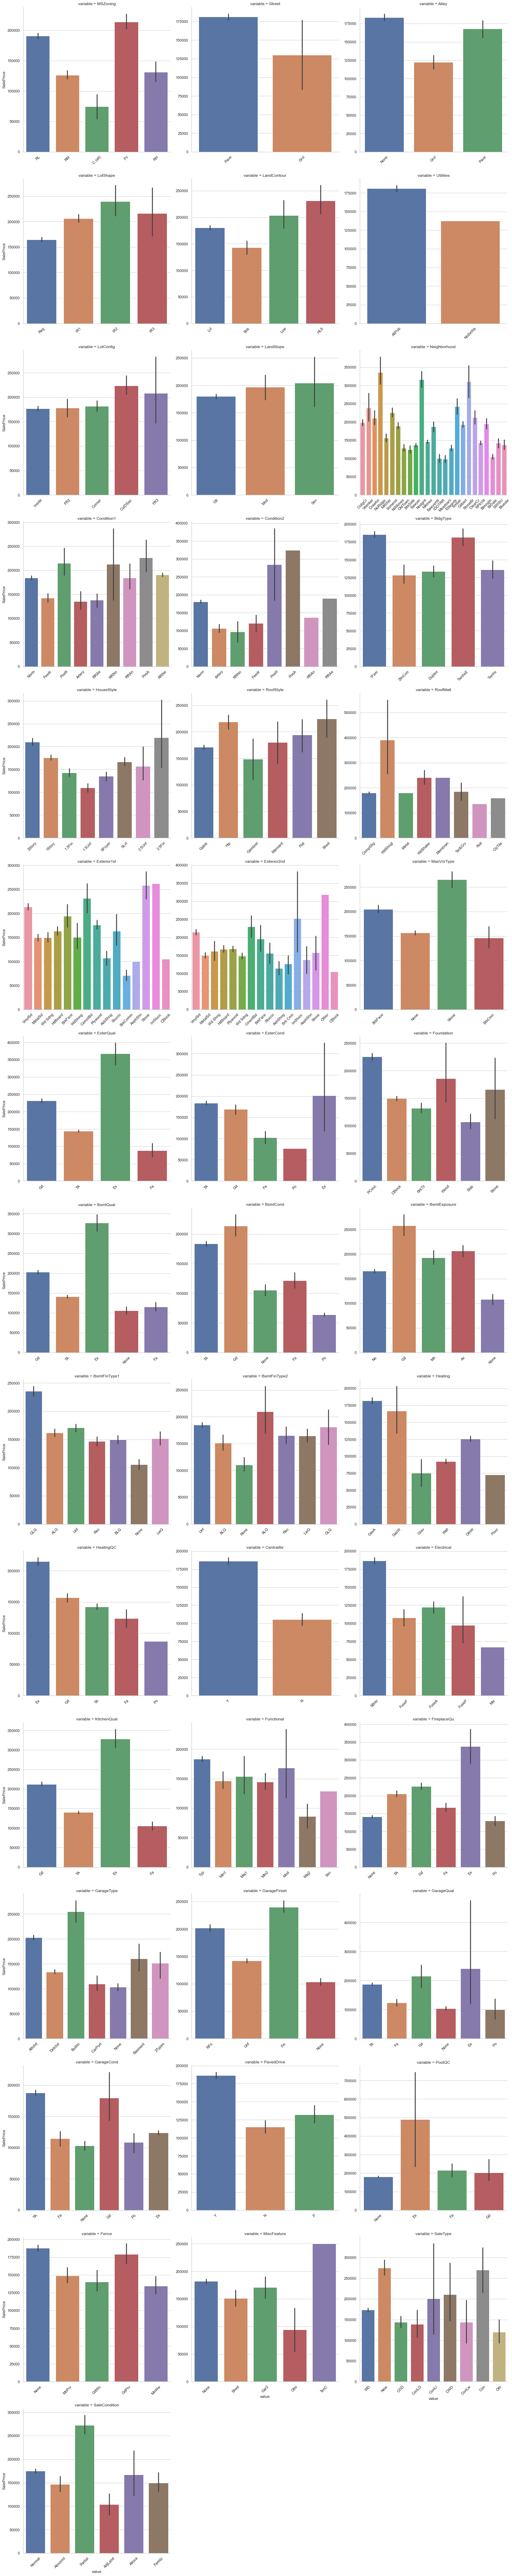

In [37]:
# barplot fonksiyonu tanimlandi
# fonksiyon icnide xticks rotasyon uygulandi 
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=45)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=qualitative)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=7)
g = g.map(barplot, "value", "SalePrice")

- Degisken degerlerinin bar grafigini SalePrice degiskenine gore siralyarak cizdirmek icin dongu ve fonksiyon tanimlayabiliriz

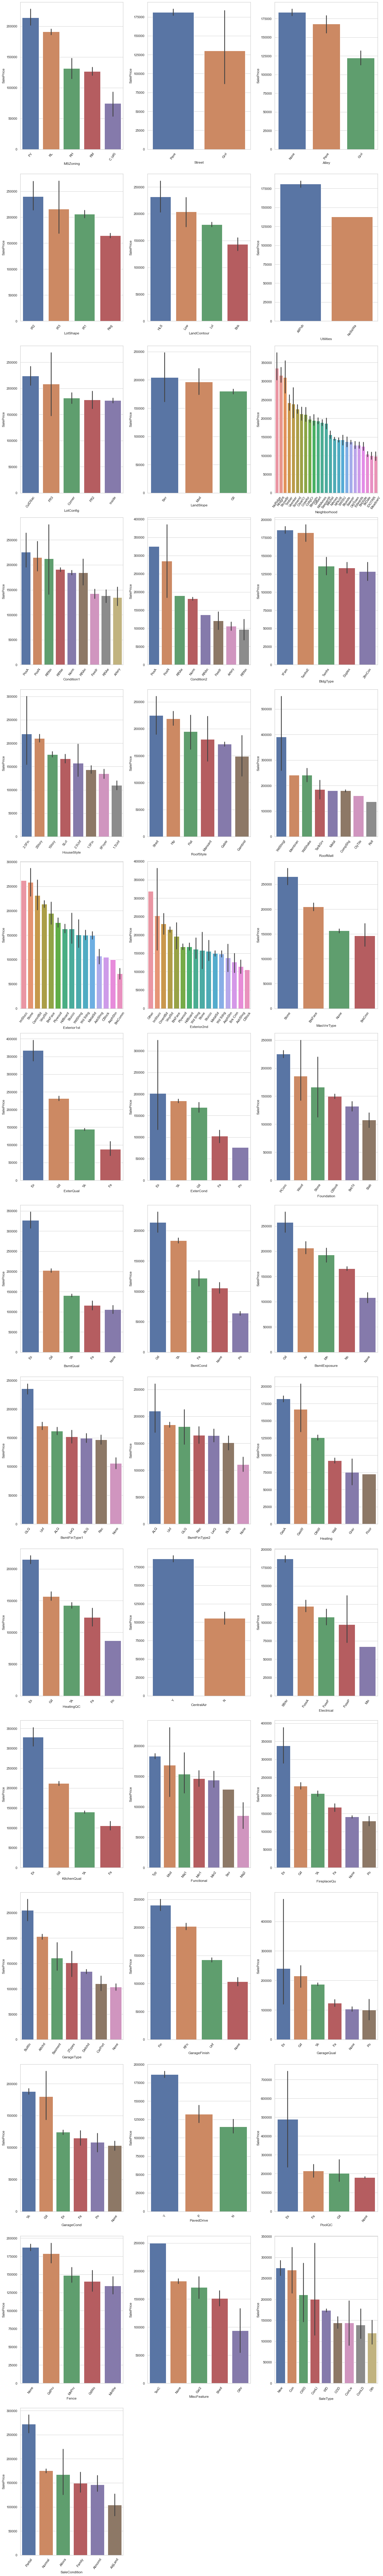

In [38]:
# sirali olarak barplot yapmak icin fonksiyon tanimi
def barplot_ordered(df, category, target_var, **kwargs):
    
    # kategorik degisken degerlerini saleprice ortalamasina gore buyukten kucuge sirala
    ordering = house_prices_clean.groupby([category]).mean()[target_var].sort_values(ascending=False)
    # barplot metodunu order parametresi ile siralama yapacak sekilde cagirdik
    sns.barplot(x=df[category], y=df[target_var], order = ordering.index)
    x=plt.xticks(rotation=55)

# SalePrice ve qualitative listesindeki degiskenler karsilastirilacak
target_var = 'SalePrice'
# her satir icin cizilecek grafik
column_n = 3
# satir sayisini hesaplama
row_n = np.ceil(len(qualitative)/column_n)
# satir ve sutun sayisindan grafik boyutu hesabi
plt.figure(figsize=(6 * column_n, 8 * row_n ))

for i,category in enumerate(qualitative):
    plt.subplot(row_n,column_n,i+1)
    barplot_ordered(house_prices_clean, category, target_var)
    plt.xlabel(category)
# grafiklerin icice gecmemesi ve axis ismlendirmelerinin rahatca gorulmesi icin
plt.tight_layout()
plt.show()
    

- SalePrice degiskeninde belirgin farklilik olusturan (olumlu/olumsuz) kategorik degiskenler ayrilarak incelenir. 

In [39]:
# kategorik degiskenlerden degerler arasinda belirgin farklilik olanlar ayri bir listede
differential_categories = ['MSZoning', 'LandContour', 'Utilities', 'Neighborhood', 
                         'Condition1', 'Condition2' , 'BldgType', 'RoofMatl',
                         'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 
                         'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                         'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
                         'CentralAir', 'Electrical', 'KitchenQual', 'GarageType',
                         'GarageFinish', 'PavedDrive', 'SaleCondition']

***T testi***
- t-testi, kategorik degiskenlerdeki deger farklılıklarınin istatistiksel olarak anlamlı olup olmadığını tespit etmemize yarar.
- t testi sonucunda p degerinin 0.05 ve altinda oldugu durumlarda grup farkliliklarinin belirgin oldugu soylenebilir.
- t testine sadece ilgimizi ceken farklilik olusturan kategorik degiskenler sabit tutuldu.

In [40]:
# t testi yapan fonksiyon tanimi
# ilk degisken df, ikinci t testi yapilacak kategorik degisken,
# ucuncu parametre hedef degisken(ler) listesi
def ttest(df, column, target_vars):
    uniques = df[column].unique()
    pd.options.display.float_format = '{:.15f}'.format
    for var in target_vars:
        karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
        print("{} için {} degerlerini karşılaştırma".format(var, column),end='')
        for i in range(0, len(uniques)):
            for j in range(i+1, len(uniques)):
                ttest = stats.ttest_ind(df[df[column]==uniques[i]][var], 
                                    df[df[column]==uniques[j]][var])
                grup_1 = uniques[i]
                grup_2 = uniques[j]
                istatistik = ttest[0]
                p_degeri = ttest[1]

                karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                      "grup_2" : grup_2 ,
                                                      "istatistik": istatistik , 
                                                      "p_degeri" : p_degeri}, ignore_index=True)
        display(karsilastirma)
for column in differential_categories:
    ttest(house_prices_clean, column, ['SalePrice'])

SalePrice için MSZoning degerlerini karşılaştırma

grup_1   grup_2          istatistik          p_degeri
0       RL       RM  11.438976301048546 0.000000000000000
1       RL  C (all)   4.555403285037849 0.000005781371468
2       RL       FV  -2.269521303492269 0.023411437975483
3       RL       RH   2.939137542311863 0.003356154977450
4       RM  C (all)   3.334731251556495 0.000997822737851
5       RM       FV -12.555550172791989 0.000000000000000
6       RM       RH  -0.423384005469287 0.672407338941861
7  C (all)       FV  -8.139418517089082 0.000000000007703
8  C (all)       RH  -4.041521807012037 0.000474400315319
9       FV       RH   5.952131741019837 0.000000069081913

SalePrice için LandContour degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0    Lvl    Bnk  3.714990602744433 0.000211370601298
1    Lvl    Low -1.767811747313155 0.077319068964841
2    Lvl    HLS -4.486925392080365 0.000007835920892
3    Bnk    Low -4.526959324792141 0.000017008132686
4    Bnk    HLS -6.060536806839897 0.000000019031918
5    Low    HLS -1.345678461846829 0.182027290716228

SalePrice için Utilities degerlerini karşılaştırma

grup_1  grup_2 istatistik p_degeri
0  AllPub  NoSeWa        NaN      NaN

SalePrice için Neighborhood degerlerini karşılaştırma

grup_1   grup_2          istatistik          p_degeri
0    CollgCr  Veenker  -2.466350097569298 0.014711212552201
1    CollgCr  Crawfor  -1.387069844209818 0.166972063158096
2    CollgCr  NoRidge -10.803433229404586 0.000000000000000
3    CollgCr  Mitchel   5.257672853057294 0.000000378084878
4    CollgCr  Somerst  -3.810692726736017 0.000177192705347
..       ...      ...                 ...               ...
295  Blmngtn    SWISU   5.237932751367115 0.000005531666485
296  Blmngtn  Blueste   2.571292892547024 0.019821058385548
297   BrDale    SWISU  -4.392531659174663 0.000083257829496
298   BrDale  Blueste  -2.999247569354940 0.008492818928430
299    SWISU  Blueste   0.215229403424501 0.831334664515026

[300 rows x 4 columns]

SalePrice için Condition1 degerlerini karşılaştırma

grup_1  grup_2         istatistik          p_degeri
0     Norm   Feedr  4.613214984545910 0.000004344457766
1     Norm    PosN -1.638077107028370 0.101651961599359
2     Norm  Artery  4.159503656045260 0.000033976473388
3     Norm    RRAe  1.880068902779970 0.060327601601819
4     Norm    RRNn -0.765966307446119 0.443839473612944
5     Norm    RRAn  0.006161875564896 0.995084522913586
6     Norm    PosA -1.438132008133306 0.150643743456528
7     Norm    RRNe -0.108811484598309 0.913369339849782
8    Feedr    PosN -6.036219516443202 0.000000028218732
9    Feedr  Artery  0.774037465356658 0.440347167730685
10   Feedr    RRAe  0.312811060767120 0.755147907150808
11   Feedr    RRNn -3.302042359008198 0.001410937039705
12   Feedr    RRAn -3.798847965034366 0.000243910650533
13   Feedr    PosA -5.225348317359348 0.000001177174708
14   Feedr    RRNe -1.609601213779481 0.111375620301377
15    PosN  Artery  4.479970453582999 0.000030930557578
16    PosN    RRAe  3.735344003458379 0.000850344747956
17    PosN    RRNn  0.077683177761306 0.938782280743867
18    PosN    RRAn  1.550415282350962 0.128371490231842
19    PosN    PosA -0.409693506776331 0.685520137772182
20    PosN    RRNe  0.517389163807493 0.610855876882098
21  Artery    RRAe -0.162314144762277 0.871632517229305
22  Artery    RRNn -2.391408665355436 0.020510542921084
23  Artery    RRAn -3.058158931087907 0.003125601842031
24  Artery    PosA -3.680199544229456 0.000539032531554
25  Artery    RRNe -1.176765751767918 0.245091754852478
26    RRAe    RRNn -2.535708480614063 0.023766739905403
27    RRAe    RRAn -2.228422801848332 0.032373745025503
28    RRAe    PosA -4.913272876571009 0.000131432438193
29    RRAe    RRNe -2.965030834190455 0.012859093321797
30    RRNn    RRAn  0.811834282898084 0.423500655084997
31    RRNn    PosA -0.336130280625055 0.743097047579537
32    RRNn    RRNe  0.308233680698086 0.770332379021666
33    RRAn    PosA -1.617890095439869 0.115502611982532
34    RRAn    RRNe -0.133406064679044 0.894899465202895
35    PosA    RRNe  0.906663915991667 0.391075205658957

SalePrice için Condition2 degerlerini karşılaştırma

grup_1  grup_2         istatistik          p_degeri
0     Norm  Artery  1.330520458740285 0.183556777159003
1     Norm    RRNn  1.504143746927756 0.132762883518100
2     Norm   Feedr  1.851327862944495 0.064325749565717
3     Norm    PosN -1.845903048785942 0.065110716538907
4     Norm    PosA                nan               nan
5     Norm    RRAn                nan               nan
6     Norm    RRAe                nan               nan
7   Artery    RRNn  0.319661392904331 0.779527266975079
8   Artery   Feedr -0.573276723516528 0.587284239076527
9   Artery    PosN -1.769887170441731 0.218766106125962
10  Artery    PosA                nan               nan
11  Artery    RRAn                nan               nan
12  Artery    RRAe                nan               nan
13    RRNn   Feedr -0.861916325030616 0.421839675329752
14    RRNn    PosN -1.808302639664114 0.212287891726330
15    RRNn    PosA                nan               nan
16    RRNn    RRAn                nan               nan
17    RRNn    RRAe                nan               nan
18   Feedr    PosN -3.064963274268236 0.022084075870500
19   Feedr    PosA                nan               nan
20   Feedr    RRAn                nan               nan
21   Feedr    RRAe                nan               nan
22    PosN    PosA                nan               nan
23    PosN    RRAn                nan               nan
24    PosN    RRAe                nan               nan
25    PosA    RRAn                nan               nan
26    PosA    RRAe                nan               nan
27    RRAn    RRAe                nan               nan

SalePrice için BldgType degerlerini karşılaştırma

grup_1  grup_2         istatistik          p_degeri
0    1Fam  2fmCon  3.852021699020662 0.000123091276383
1    1Fam  Duplex  4.543962350113056 0.000006046271687
2    1Fam  TwnhsE  0.479505443710409 0.631657813894907
3    1Fam   Twnhs  3.937156835690728 0.000086960694141
4  2fmCon  Duplex -0.729151681703202 0.468012039432159
5  2fmCon  TwnhsE -4.694789113038583 0.000006190767497
6  2fmCon   Twnhs -0.818243103442155 0.415918217982789
7  Duplex  TwnhsE -5.494146049916781 0.000000147312861
8  Duplex   Twnhs -0.334163775834776 0.739008357930480
9  TwnhsE   Twnhs  4.595160820966983 0.000008906243733

SalePrice için RoofMatl degerlerini karşılaştırma

grup_1   grup_2         istatistik          p_degeri
0   CompShg  WdShngl -6.549575351377654 0.000000000080119
1   CompShg    Metal                nan               nan
2   CompShg  WdShake -1.770971270112809 0.076777422185987
3   CompShg  Membran                nan               nan
4   CompShg  Tar&Grv -0.238410739131692 0.811596389552604
5   CompShg     Roll                nan               nan
6   CompShg  ClyTile                nan               nan
7   WdShngl    Metal                nan               nan
8   WdShngl  WdShake  1.574302850890323 0.149869532187457
9   WdShngl  Membran                nan               nan
10  WdShngl  Tar&Grv  3.083584740086140 0.007566686120613
11  WdShngl     Roll                nan               nan
12  WdShngl  ClyTile                nan               nan
13    Metal  WdShake                nan               nan
14    Metal  Membran                nan               nan
15    Metal  Tar&Grv                nan               nan
16    Metal     Roll                nan               nan
17    Metal  ClyTile                nan               nan
18  WdShake  Membran                nan               nan
19  WdShake  Tar&Grv  1.771903793406259 0.098164510809805
20  WdShake     Roll                nan               nan
21  WdShake  ClyTile                nan               nan
22  Membran  Tar&Grv                nan               nan
23  Membran     Roll                nan               nan
24  Membran  ClyTile                nan               nan
25  Tar&Grv     Roll                nan               nan
26  Tar&Grv  ClyTile                nan               nan
27     Roll  ClyTile                nan               nan

SalePrice için Exterior1st degerlerini karşılaştırma

grup_1   grup_2         istatistik          p_degeri
0    VinylSd  MetalSd 10.808614975675713 0.000000000000000
1    VinylSd  Wd Sdng  9.929493293593803 0.000000000000000
2    VinylSd  HdBoard  8.234629399377850 0.000000000000001
3    VinylSd  BrkFace  1.600034405034059 0.110151922553676
4    VinylSd  WdShing  3.908582962091362 0.000104667488549
..       ...      ...                ...               ...
100  AsphShn  ImStucc                nan               nan
101  AsphShn   CBlock                nan               nan
102    Stone  ImStucc                nan               nan
103    Stone   CBlock                nan               nan
104  ImStucc   CBlock                nan               nan

[105 rows x 4 columns]

SalePrice için Exterior2nd degerlerini karşılaştırma

grup_1   grup_2         istatistik          p_degeri
0    VinylSd  MetalSd 10.701814524420591 0.000000000000000
1    VinylSd  Wd Shng  3.882684613446973 0.000116104933560
2    VinylSd  HdBoard  7.285449072655477 0.000000000000856
3    VinylSd  Plywood  6.532344651950049 0.000000000131546
4    VinylSd  Wd Sdng 10.417431927972379 0.000000000000000
..       ...      ...                ...               ...
115  AsphShn    Other                nan               nan
116  AsphShn   CBlock                nan               nan
117    Stone    Other                nan               nan
118    Stone   CBlock                nan               nan
119    Other   CBlock                nan               nan

[120 rows x 4 columns]

SalePrice için MasVnrType degerlerini karşılaştırma

grup_1  grup_2          istatistik          p_degeri
0  BrkFace    None  11.911564821214668 0.000000000000000
1  BrkFace   Stone  -7.081329496264814 0.000000000004213
2  BrkFace  BrkCmn   2.766751640195384 0.005890902768857
3     None   Stone -16.974051383191856 0.000000000000000
4     None  BrkCmn   0.666771056387469 0.505092173835418
5    Stone  BrkCmn   4.554197771272023 0.000011274226883

SalePrice için ExterQual degerlerini karşılaştırma

grup_1 grup_2          istatistik          p_degeri
0     Gd     TA  28.642928609072069 0.000000000000000
1     Gd     Ex -12.142126511284498 0.000000000000000
2     Gd     Fa   7.511457790762990 0.000000000000271
3     TA     Ex -31.723687964505498 0.000000000000000
4     TA     Fa   4.931121311687243 0.000000970158773
5     Ex     Fa   8.799227946156321 0.000000000001269

SalePrice için ExterCond degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0     TA     Gd  2.190814683356489 0.028626584857057
1     TA     Fa  5.383491635192457 0.000000086506993
2     TA     Po                nan               nan
3     TA     Ex -0.374737818199422 0.707917394486356
4     Gd     Fa  4.689343141253158 0.000005559501281
5     Gd     Po                nan               nan
6     Gd     Ex -0.759418286418832 0.448818470548700
7     Fa     Po                nan               nan
8     Fa     Ex -3.374707949823431 0.002115262754911
9     Po     Ex                nan               nan

SalePrice için Foundation degerlerini karşılaştırma

grup_1  grup_2         istatistik          p_degeri
0    PConc  CBlock 19.153684100959705 0.000000000000000
1    PConc  BrkTil 12.384227990243970 0.000000000000000
2    PConc    Wood  0.787751355259642 0.431130209068846
3    PConc    Slab  6.624173451553246 0.000000000071810
4    PConc   Stone  1.664829355429156 0.096427969473149
5   CBlock  BrkTil  3.852222727962800 0.000126687362280
6   CBlock    Wood -1.282319835593453 0.200198395781819
7   CBlock    Slab  4.263211895217360 0.000023109923539
8   CBlock   Stone -0.810233191583607 0.418108269376641
9   BrkTil    Wood -1.675415949947020 0.095978514401350
10  BrkTil    Slab  2.164786578485901 0.031815224120766
11  BrkTil   Stone -1.454795207089202 0.147815403817297
12    Wood    Slab  3.500728708422995 0.001762271692771
13    Wood   Stone  0.381880192132997 0.713878691071376
14    Slab   Stone -2.825917950808250 0.008599996080612

SalePrice için BsmtQual degerlerini karşılaştırma

grup_1 grup_2          istatistik          p_degeri
0     Gd     TA  21.548613288178785 0.000000000000000
1     Gd     Ex -17.824280817086482 0.000000000000000
2     Gd   None  10.078727039582713 0.000000000000000
3     Gd     Fa   8.768584273414200 0.000000000000000
4     TA     Ex -31.308186417878265 0.000000000000000
5     TA   None   4.846973980399742 0.000001552472315
6     TA     Fa   3.353380268102771 0.000842450718794
7     Ex   None  11.715632457885475 0.000000000000000
8     Ex     Fa  10.844288193072099 0.000000000000000
9   None     Fa  -1.334433573389912 0.186386494081353

SalePrice için BsmtCond degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0     TA     Gd -2.977279589210457 0.002959111120614
1     TA   None  5.952057433812485 0.000000003372703
2     TA     Fa  5.187788416916844 0.000000245199289
3     TA     Po  2.126902781269621 0.033614462772591
4     Gd   None  8.631504079880687 0.000000000000098
5     Gd     Fa  7.580676674076544 0.000000000012626
6     Gd     Po  2.890057437644588 0.005229992402811
7   None     Fa -1.928637230510532 0.057322978889036
8   None     Po  1.986094903243929 0.054468792922766
9     Fa     Po  1.860960126206616 0.069290746867577

SalePrice için BsmtExposure degerlerini karşılaştırma

grup_1 grup_2          istatistik          p_degeri
0     No     Gd -14.156126912608627 0.000000000000000
1     No     Mn  -4.369350182089960 0.000013679881815
2     No     Av  -8.213912707049227 0.000000000000001
3     No   None   5.827082131783896 0.000000007626127
4     Gd     Mn   4.996222157305328 0.000001109850779
5     Gd     Av   4.610243646941433 0.000005630169764
6     Gd   None   7.668583087771283 0.000000000001280
7     Mn     Av  -1.413709064491153 0.158381494064916
8     Mn   None   6.565501182353804 0.000000000797185
9     Av   None   6.777687848733188 0.000000000083147

SalePrice için BsmtFinType1 degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0     GLQ    ALQ 10.923392803159675 0.000000000000000
1     GLQ    Unf 11.303166613057403 0.000000000000000
2     GLQ    Rec 10.559634120488798 0.000000000000000
3     GLQ    BLQ 10.730042983082779 0.000000000000000
4     GLQ   None  8.423211182301195 0.000000000000000
5     GLQ    LwQ  7.512103532175535 0.000000000000278
6     ALQ    Unf -1.662117784328498 0.096972784591424
7     ALQ    Rec  2.740614426137624 0.006446078681559
8     ALQ    BLQ  2.297833854504610 0.022134660704320
9     ALQ   None  6.507004073079397 0.000000000403379
10    ALQ    LwQ  1.423450734432690 0.155673126773778
11    Unf    Rec  3.569635850950280 0.000388119291589
12    Unf    BLQ  3.314439213982588 0.000975955694411
13    Unf   None  5.407057838887797 0.000000102634056
14    Unf    LwQ  2.141131221309317 0.032744345775761
15    Rec    BLQ -0.470505479644693 0.638361526815011
16    Rec   None  5.246501061799975 0.000000462177658
17    Rec    LwQ -0.724134110626112 0.469808980850533
18    BLQ   None  5.376810056879703 0.000000229244599
19    BLQ    LwQ -0.341594073466285 0.732982451386342
20   None    LwQ -5.116388977975758 0.000001346398673

SalePrice için Heating degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0    GasA   GasW  0.818659948564280 0.413115532785655
1    GasA   Grav  3.561073653068924 0.000381424528064
2    GasA   Wall  2.268137625754489 0.023469410933239
3    GasA   OthW  1.003642044986167 0.315721214389563
4    GasA  Floor                nan               nan
5    GasW   Grav  2.971053044966716 0.006839032791324
6    GasW   Wall  1.861358869770274 0.077457259703397
7    GasW   OthW  0.718440729491062 0.481708042737720
8    GasW  Floor                nan               nan
9    Grav   Wall -1.164127832177928 0.274302861254299
10   Grav   OthW -2.415714088239641 0.046383138454405
11   Grav  Floor                nan               nan
12   Wall   OthW -8.230684183763506 0.001188046005703
13   Wall  Floor                nan               nan
14   OthW  Floor                nan               nan

SalePrice için HeatingQC degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0     Ex     Gd  9.738277565716341 0.000000000000000
1     Ex     TA 15.873469964628075 0.000000000000000
2     Ex     Fa  7.200964021319339 0.000000000001397
3     Ex     Po                nan               nan
4     Gd     TA  3.647182949587896 0.000285807679088
5     Gd     Fa  4.003966690864497 0.000079317268251
6     Gd     Po                nan               nan
7     TA     Fa  2.572053867427192 0.010412579489136
8     TA     Po                nan               nan
9     Fa     Po                nan               nan

SalePrice için CentralAir degerlerini karşılaştırma

grup_1 grup_2        istatistik          p_degeri
0      Y      N 9.914905121389344 0.000000000000000

SalePrice için Electrical degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0  SBrkr  FuseF  5.141809292207681 0.000000311850009
1  SBrkr  FuseA  7.785266403006543 0.000000000000013
2  SBrkr  FuseP  1.940409344302940 0.052540125462824
3  SBrkr    Mix                nan               nan
4  FuseF  FuseA -1.841200311165870 0.068082833209805
5  FuseF  FuseP  0.549248731050636 0.587188865325573
6  FuseF    Mix                nan               nan
7  FuseA  FuseP  1.131909787152370 0.260521420080153
8  FuseA    Mix                nan               nan
9  FuseP    Mix                nan               nan

SalePrice için KitchenQual degerlerini karşılaştırma

grup_1 grup_2          istatistik          p_degeri
0     Gd     TA  25.262804920101303 0.000000000000000
1     Gd     Ex -14.355847221657255 0.000000000000000
2     Gd     Fa  10.280898742035410 0.000000000000000
3     TA     Ex -31.938167356009007 0.000000000000000
4     TA     Fa   5.400794188330535 0.000000088407071
5     Ex     Fa  11.305388450188447 0.000000000000000

SalePrice için GarageType degerlerini karşılaştırma

grup_1   grup_2          istatistik          p_degeri
0    Attchd   Detchd  16.516253175963392 0.000000000000000
1    Attchd  BuiltIn  -5.812696499357242 0.000000008371829
2    Attchd  CarPort   3.610057537507067 0.000323484589462
3    Attchd     None  11.515505741236559 0.000000000000000
4    Attchd  Basment   2.373099296714559 0.017851782232374
5    Attchd   2Types   1.636758033764477 0.102041033185986
6    Detchd  BuiltIn -17.730360097110765 0.000000000000000
7    Detchd  CarPort   1.740297099099352 0.082587618619866
8    Detchd     None   6.288614244271993 0.000000000738013
9    Detchd  Basment  -2.642012889206601 0.008561587973937
10   Detchd   2Types  -1.011477192908462 0.312413600499882
11  BuiltIn  CarPort   4.217719165737037 0.000056343628462
12  BuiltIn     None  12.738711520828915 0.000000000000000
13  BuiltIn  Basment   3.847948314546382 0.000204807961344
14  BuiltIn   2Types   2.458454050905926 0.015825192497565
15  CarPort     None   0.588086426144282 0.557980528524501
16  CarPort  Basment  -2.275989164461426 0.031322214773890
17  CarPort   2Types  -2.701113558509370 0.018155375334077
18     None  Basment  -5.562205232122366 0.000000231062127
19     None   2Types  -3.441417820526533 0.000899698443141
20  Basment   2Types   0.336803445557322 0.739318990030979

SalePrice için GarageFinish degerlerini karşılaştırma

grup_1 grup_2          istatistik          p_degeri
0    RFn    Unf  17.445133964572872 0.000000000000000
1    RFn    Fin  -6.538917158101276 0.000000000112652
2    RFn   None  13.635724834202705 0.000000000000000
3    Unf    Fin -21.028518837561975 0.000000000000000
4    Unf   None   7.276565379172827 0.000000000000942
5    Fin   None  12.518278537476995 0.000000000000000

SalePrice için PavedDrive degerlerini karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0      Y      N  8.412941613609549 0.000000000000000
1      Y      P  3.711369475788738 0.000214411631304
2      N      P -1.955272179671749 0.052915148363201

SalePrice için SaleCondition degerlerini karşılaştırma

grup_1   grup_2          istatistik          p_degeri
0    Normal  Abnorml   3.908520532370560 0.000097659678952
1    Normal  Partial -14.039471944364475 0.000000000000000
2    Normal  AdjLand   2.037914389942870 0.041777435259257
3    Normal   Alloca   0.386063682140222 0.699517488102020
4    Normal   Family   1.635624403628209 0.102177014445694
5   Abnorml  Partial  -9.901244429195465 0.000000000000000
6   Abnorml  AdjLand   1.017978302427605 0.311073464415804
7   Abnorml   Alloca  -0.823099089307161 0.412216498927428
8   Abnorml   Family  -0.160441791272701 0.872805109219537
9   Partial  AdjLand   3.228673559024460 0.001582958051420
10  Partial   Alloca   3.394651323261701 0.000902539571444
11  Partial   Family   5.191966127576881 0.000000701554845
12  AdjLand   Alloca  -1.444620347107547 0.170572412083668
13  AdjLand   Family  -1.825701252963565 0.081501050423537
14   Alloca   Family   0.763706614130681 0.451006924896580

***Anova testi***
- Kategorik degiskenlerin grup (unique deger) sayisi 3 veya daha fazla oldugunda aralarindaki farka  t testini inceleyerek bakmak zorlasmaktadir. Bu durumda anova yapilmalidir.

In [41]:
df = house_prices_clean
ls = ['SaleCondition']
# her bir kategorik degisken icin 
for category in qualitative:
    # gruplardan alinan orneklemleri tutacak liste
    cat_samples = []
    # kategorik degiskendeki her bir grup(deger) icin
    for group in df[category].unique():
            # df deki degiskenin degerinin gruba esit oldugu 
            # yani o gruptaki hedef degisken degerleri ile grup orneklemi olusturulur
            group_samples = df[df[category] == group]['SalePrice'].values
            # her bir grubun orneklemi degisken orneklem listesine atilir
            cat_samples.append(group_samples)

len(cat_samples[0])

1198

In [42]:
# anova testi sonuclarini (pval degerlerini) hesaplayip yeni bir dataframede tutan fonksiyon
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    # her bir kategorik degisken icin
    for category in qualitative:
        # gruplardan alinan orneklemleri tutacak liste
        category_samples = []
        # kategorik degiskendeki her bir grup(deger) icin
        for group in frame[category].unique():
            group_samples = frame[frame[category] == group]['SalePrice'].values
            category_samples.append(group_samples)
        # tek yonlu anova testi uygulanir ve pval degeri alinir (kategori icin)
        pval = stats.f_oneway(*category_samples)[1]
        # o kategorinin pval degeri tum kategorilerin pval degerini tutan pvals e eklenir
        pvals.append(pval)
    # pvals degerleri anv df ne eklenir
    anv['pval'] = pvals
    # pval degerlerine gore kucukten buyuge siralar
    return anv.sort_values('pval')

In [43]:
a = anova(house_prices_clean)

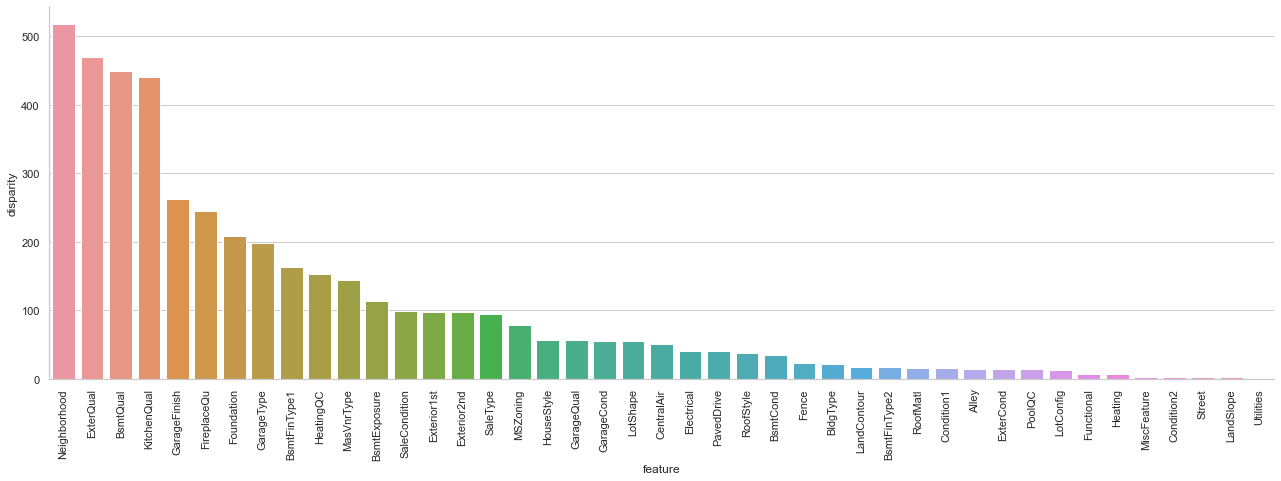

In [44]:
# dispartiy hesaplanir ve grafigi cizdirilir
a['disparity'] = np.log(1./a['pval'].values)
sns.catplot(data=a, x='feature', y='disparity', kind='bar', height=6, aspect=3)
x=plt.xticks(rotation=90)

- Anova testinde ```stats.f_oneway``` fonksiyonu ve disparity hesabi incelenecek.

***Korelasyon***

- Surekli degiskenlerin korelasyonu incelenir.

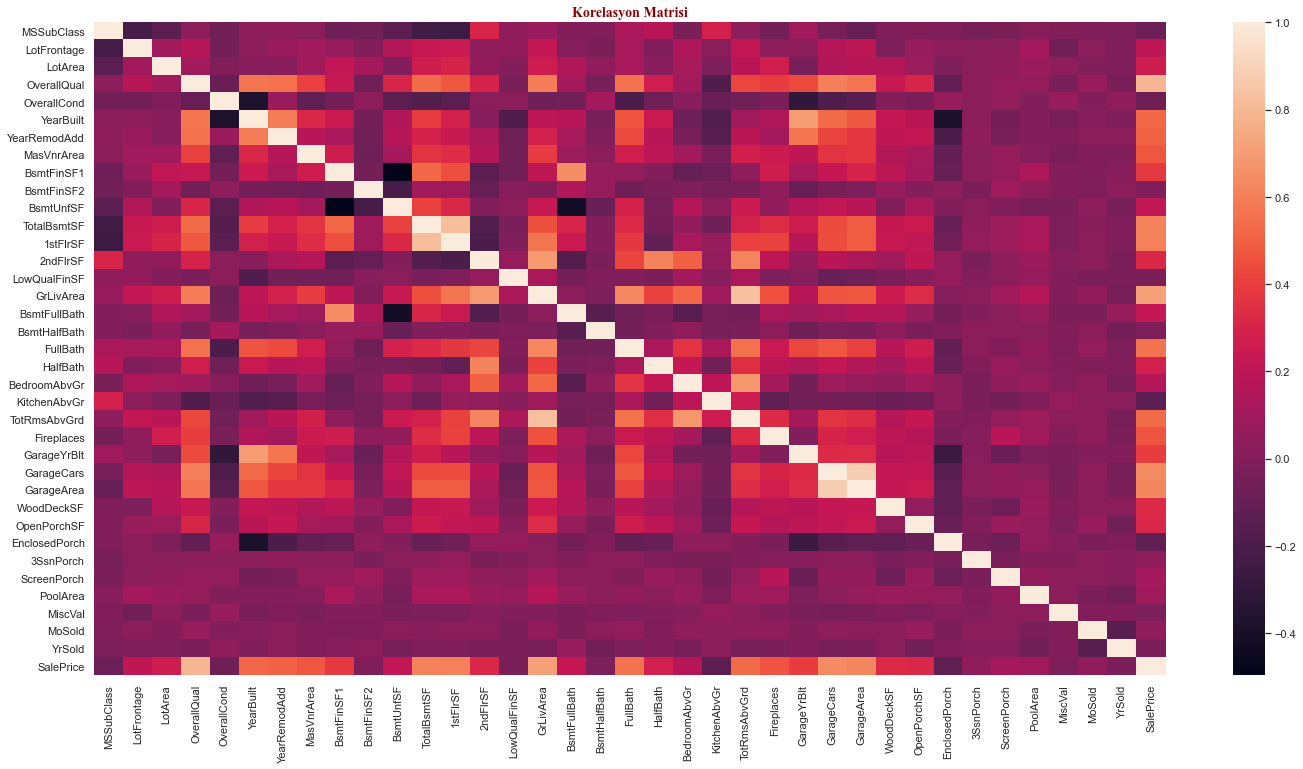

In [45]:
# matriste id degiskenini dikkate almamasi icin 
# sadece surekli degiskenlerin oldugu veriler korele edildi
corr_matrix = house_prices_clean[quantitative].corr()

plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix)
plt.title("Korelasyon Matrisi", fontdict=title_font)

plt.show()

- Hedef degiskene gore korelasyon degerleri siralanir ve grafigi incelenir.

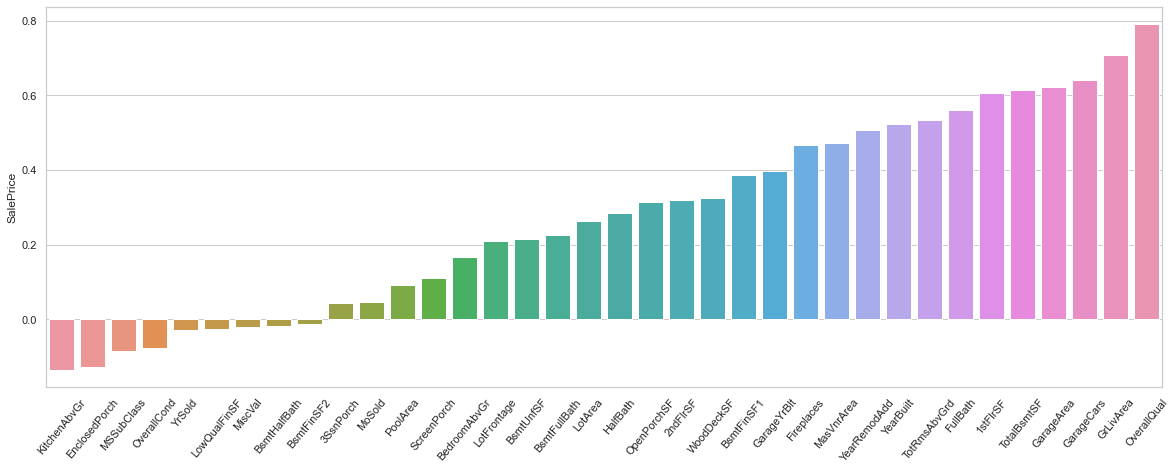

In [46]:
#corr_matrix
# sadece hedef degiskenin oldugu bolumu matristen aldik
sale_price_corr = corr_matrix['SalePrice'].sort_values()
# hedef degiskenimizi (SalePrice) cikardik
sale_price_corr.drop('SalePrice', inplace= True)

plt.figure(figsize=(20,7))
#plt.bar(x=sale_price_corr.index, height=sale_price_corr)
sns.barplot(x=sale_price_corr.index, y=sale_price_corr)
plt.xticks(rotation=50)
plt.show()

- En yuksek korelasyona sahip degiskenler negatif degerler de dikkate alinarak cikarilir.

In [47]:
# negatif korelasyon da onemli ama burda yuksek negatif korelasyon yok
sale_price_corr = np.abs(sale_price_corr).sort_values()

#En cok korele olan 6 degiskeni aldik
mostly_corr = sale_price_corr[-6:].index
mostly_corr

Index(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual'],
      dtype='object')

- En cok korele olan degiskenlerin hedef degisken ile iliskisi scatterplot ile incelenir.

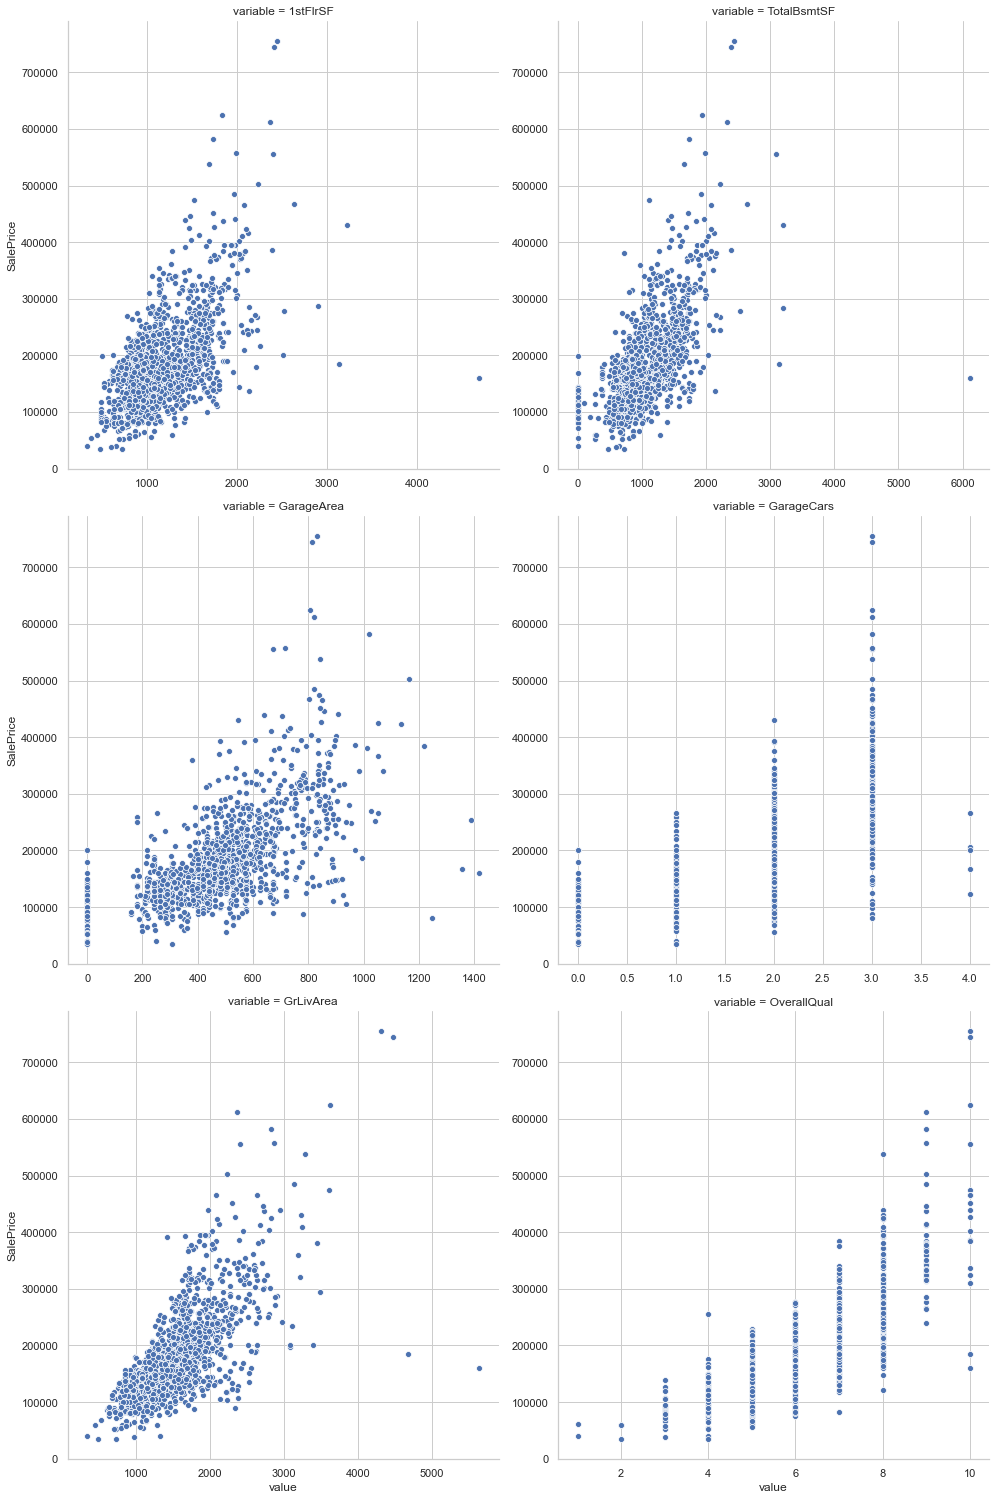

In [48]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=mostly_corr)

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(sns.scatterplot, "value", "SalePrice")

- En cok korele olanlarin ve hedef degiskenin logu alinarak iliskileri incelenedi

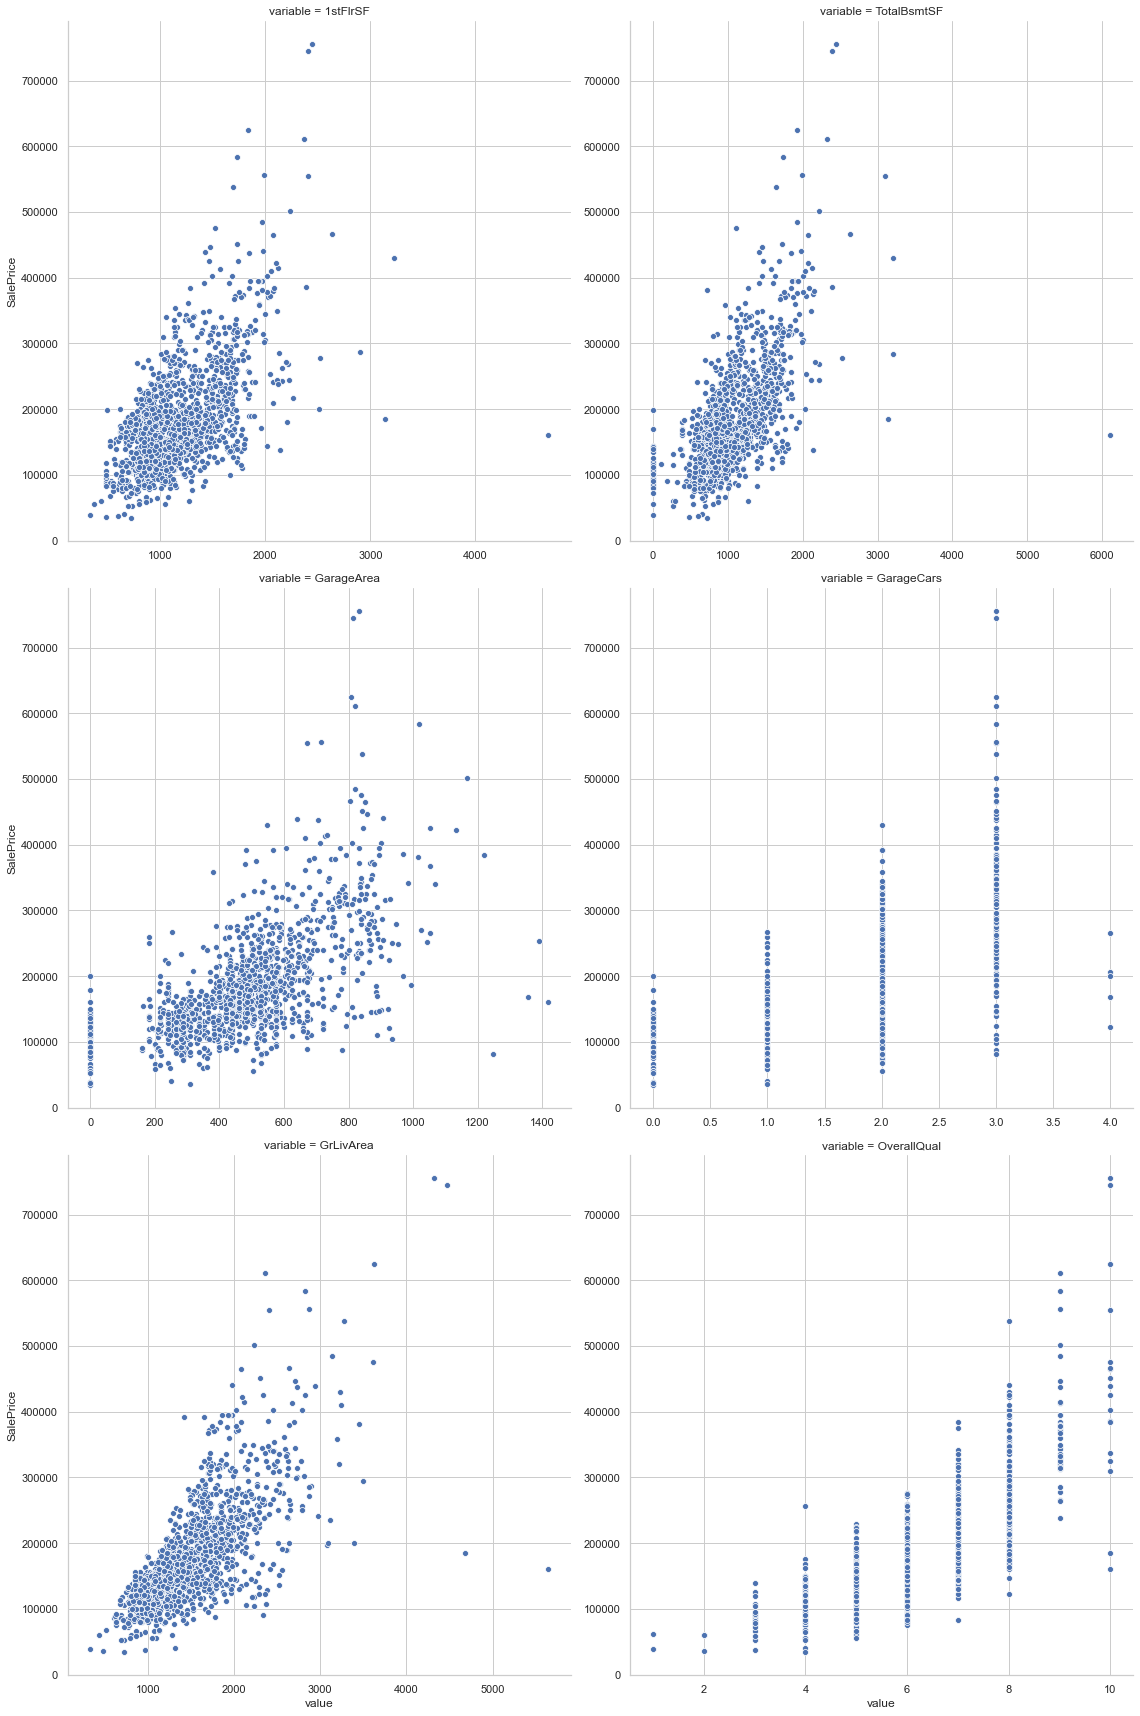

In [49]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=mostly_corr)

# log alindiginde sonuz hatasi almamak icin sifir degeri degistirildi
#f.replace(to_replace=0, value=0.1,inplace=True)
# degerlerin log alinarak ayri bir sutun olusturuldu
# log alindiginde sonuz hatasi almamak icin +1 eklendi
f['value_log'] = np.log(f['value']+1)
# SalePrice ayri sutunda oldugundan onu da logu alindi
f['SalePrice_log'] = np.log(f['SalePrice'])

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=8)
g = g.map(sns.scatterplot, "value", "SalePrice")

- Kategorik degiskenler ```hue``` parametresiyle 3 uncu boyut olarak katilarak scatter plot ile etkisi incelenir. Ayrica grid nesnesine ```add_legend()``` metodu ile legend eklenir. Kategorik ```SaleCondition``` degiskeni ```id_vars``` parametresine eklendi.

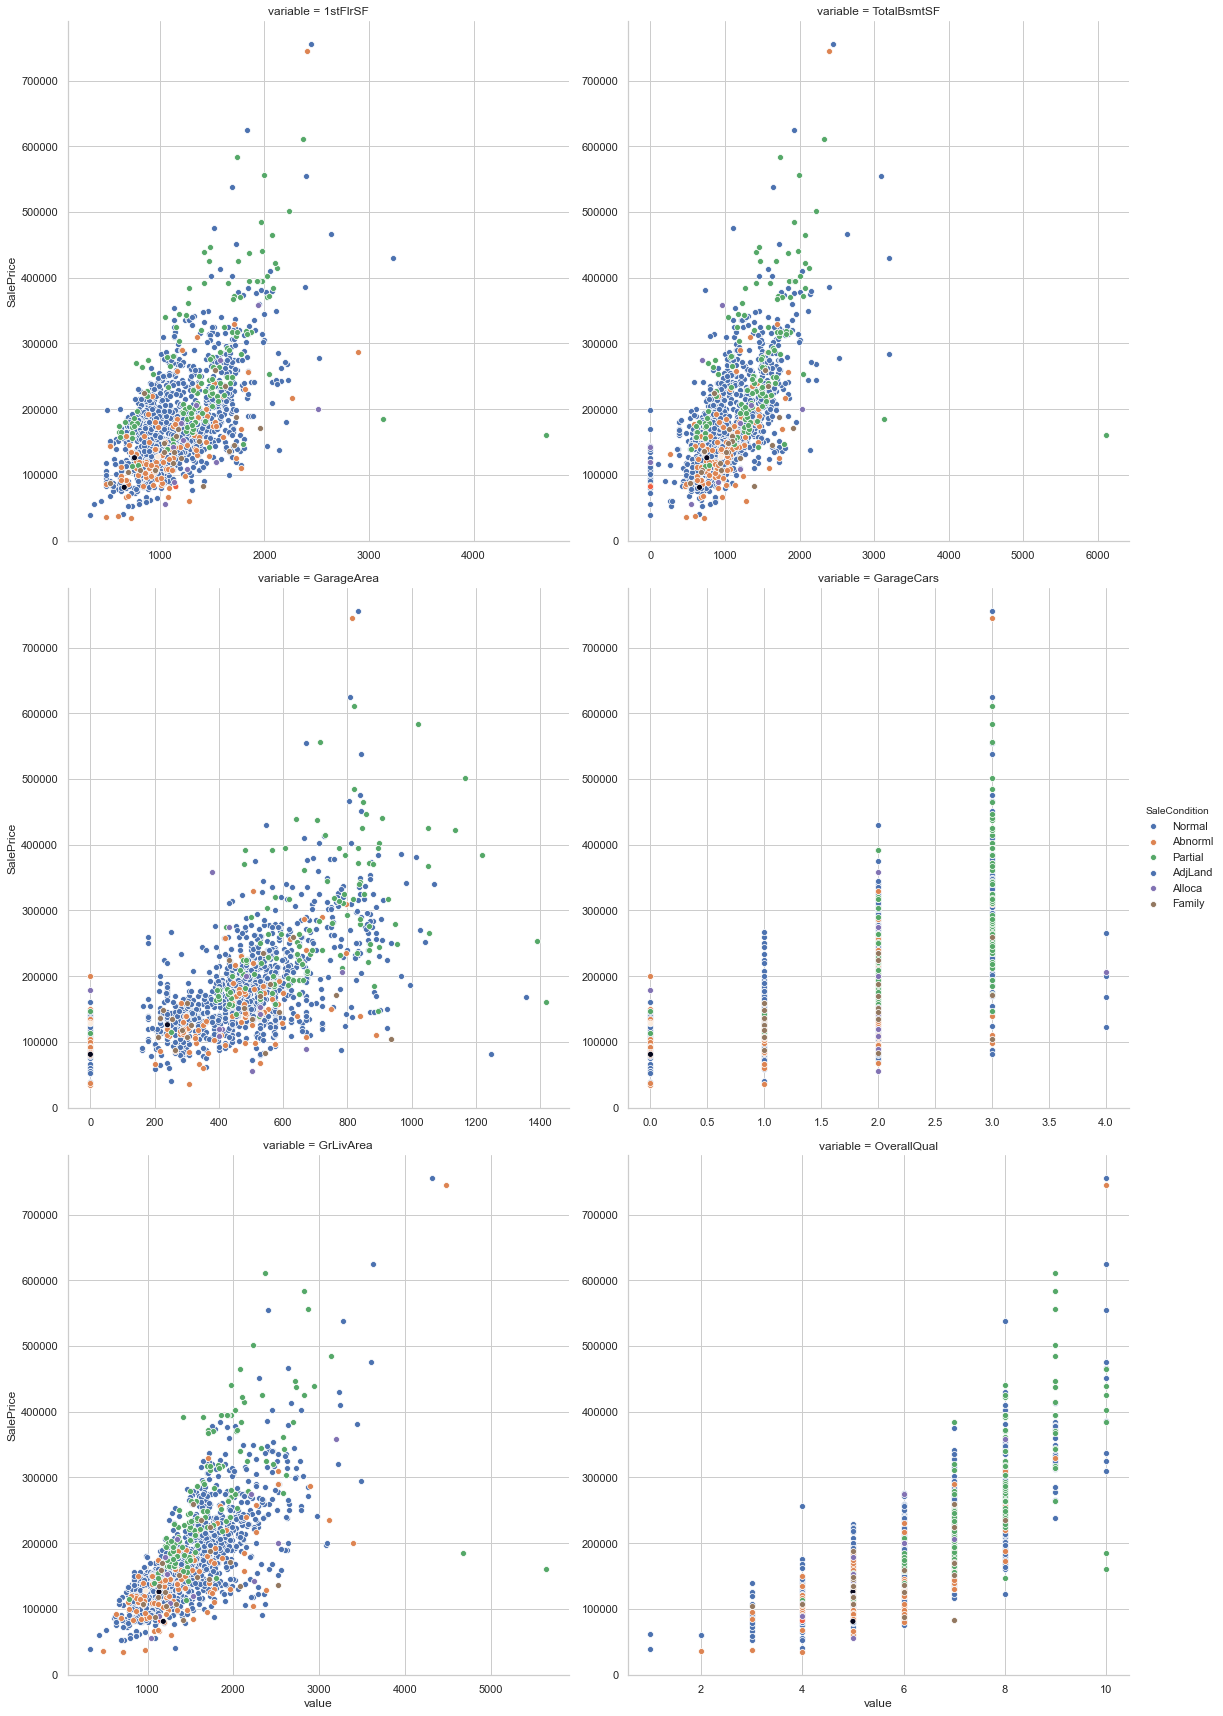

In [50]:
# melt metodu belli sutun(lari)-hedef degisken olabilir bu- id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice','SaleCondition'], value_vars=mostly_corr)

g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,
                  hue= 'SaleCondition', size=8)
g = g.map(sns.scatterplot, "value", "SalePrice")
g = g.add_legend()

- ```OverAllQual``` ve ```GarageCars``` degiskenlerinde noktalar ust uste bindiginden bu degiskenleri swarmplot ile incelemek daha mantikli olacaktir.

In [51]:
# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice', 'SaleCondition'], 
            value_vars=['OverallQual', 'GarageCars'])

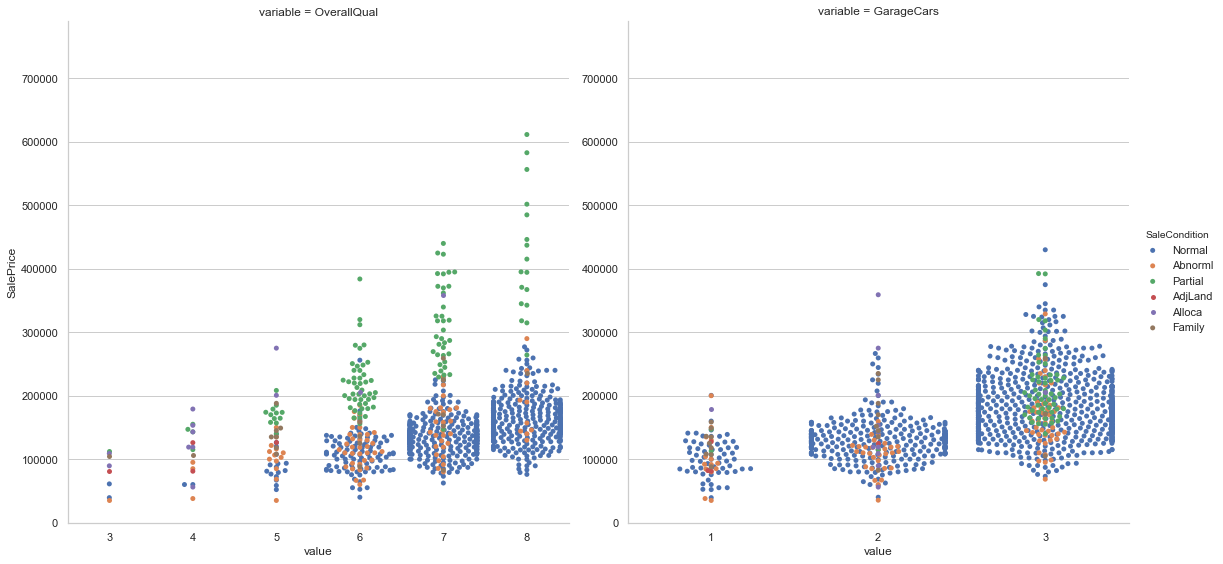

In [52]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, 
                  hue='SaleCondition', size=8)
g = g.map(sns.swarmplot, "value", "SalePrice")
g = g.add_legend()

- ```OverAllQual``` ve ```GarageCars```  degiskenlerini  yukarida tespit ettigimiz ```differential_categories``` listesindeki degiskenlerle swarm grafigi inceleyebiliriz.
- Bunun icin dongu yapabiliriz.

- FacetGrid ile melt kullanilarak farklilik olusturan kategorik degiskenlerin swarm grafiginde bazi degiskenler icin - ```Utilities``` gibi-  grafigi tam cizilemedigi goruldu.

- ```OverAllQual``` ve ```GarageCars``` ayri ayri ```differential_categories``` degiskenleri ile grafigi ```catplot``` ile incelendi. Bu kez grafiklerin dogru sekilde cizildigi goruldu.
- ```catplot``` metodunun ```kind``` parametresini degistirerek swarm, strip, box, violin, barplot gibi 8 cesit grafik cizdirebiliyoruz.

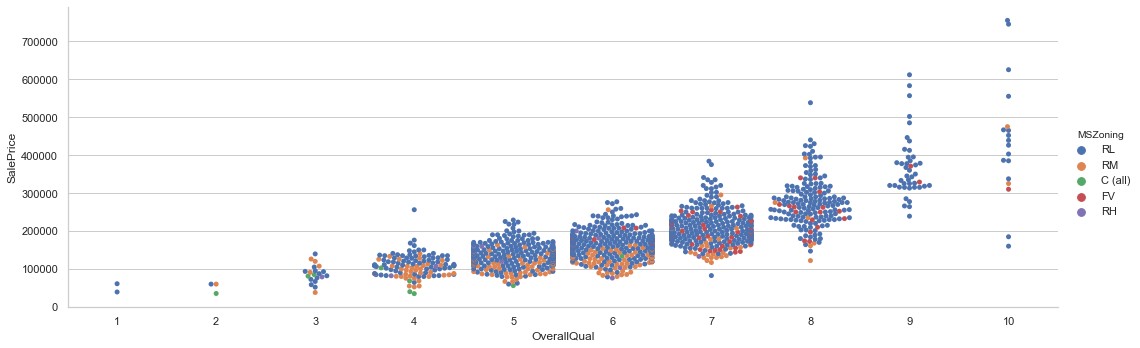

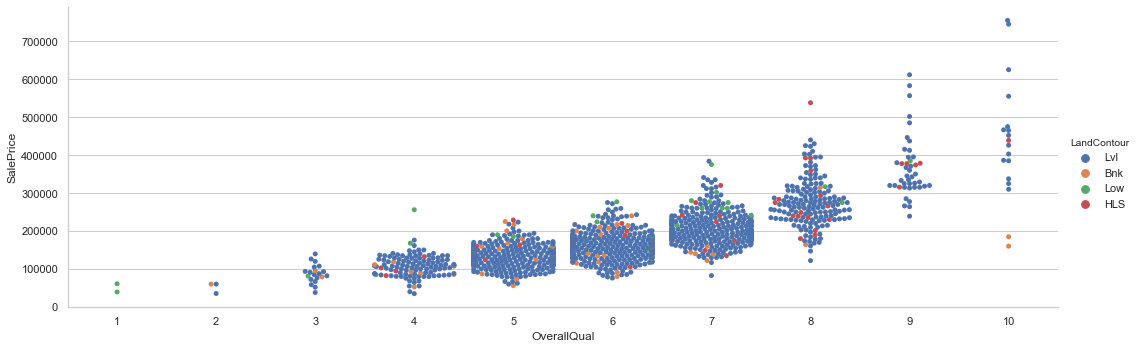

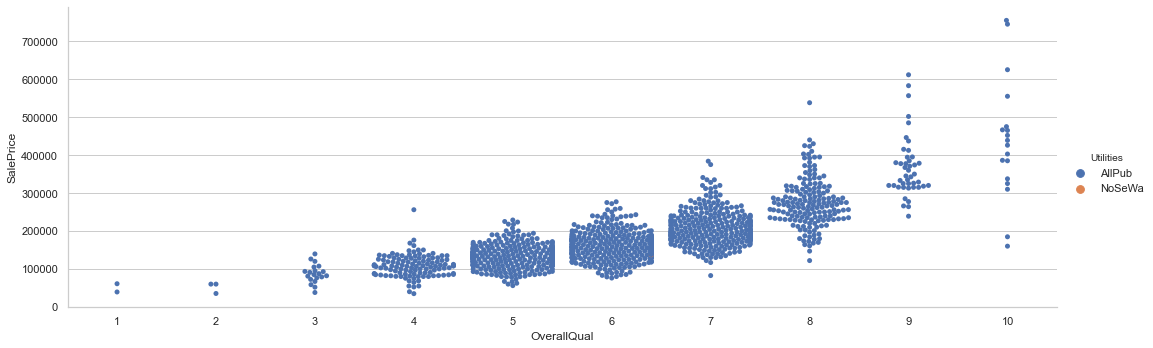

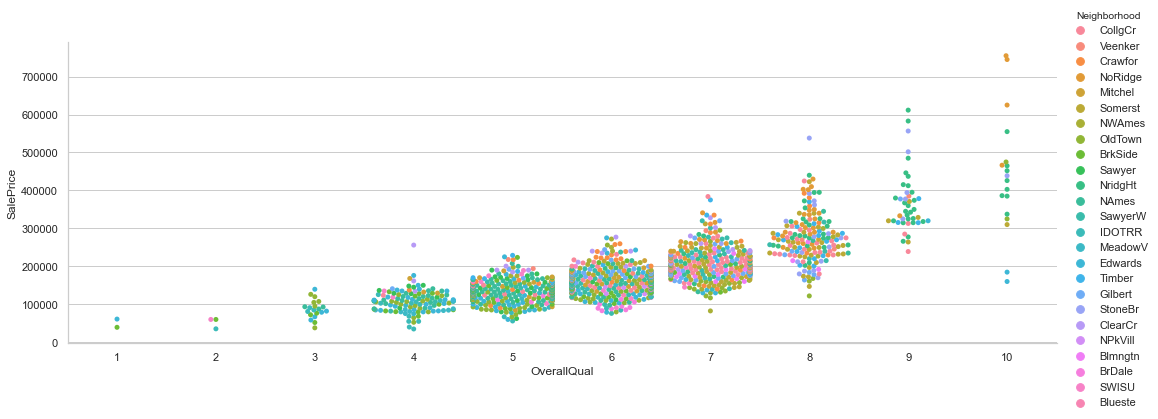

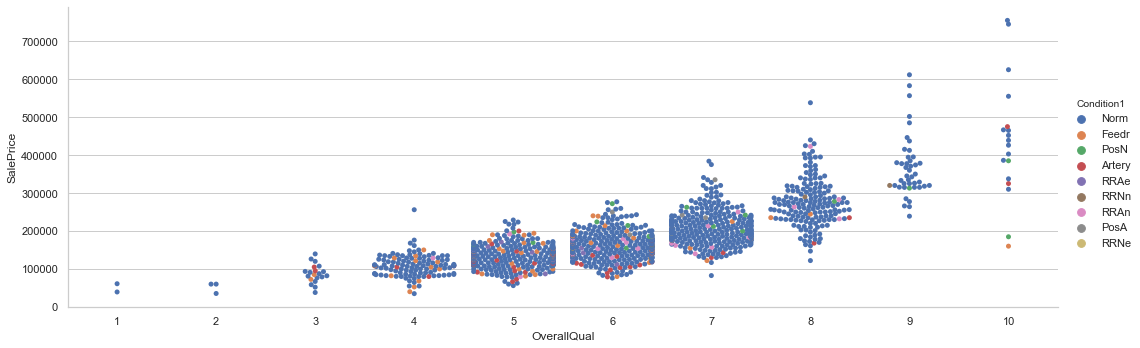

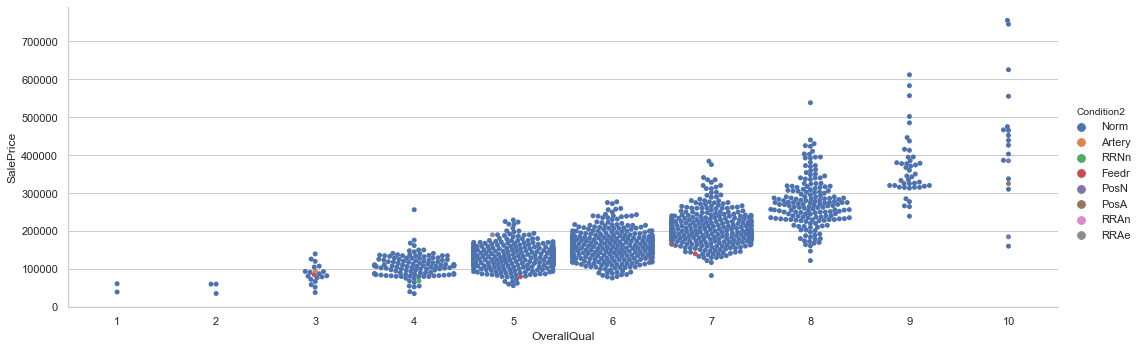

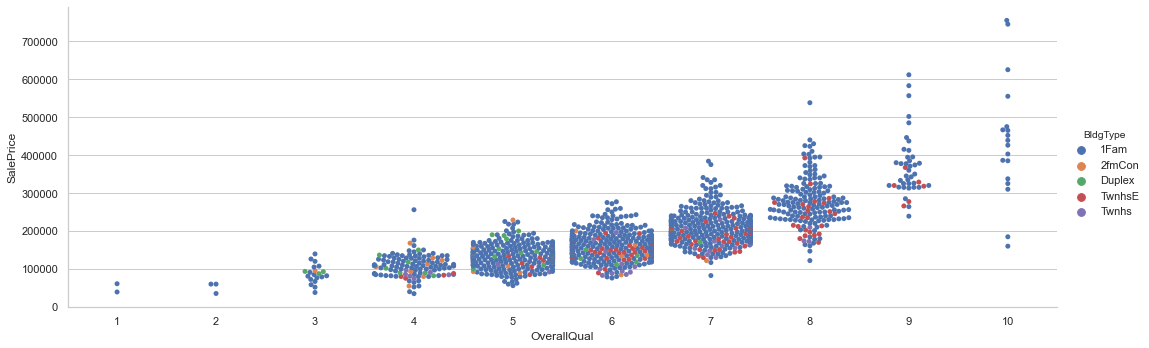

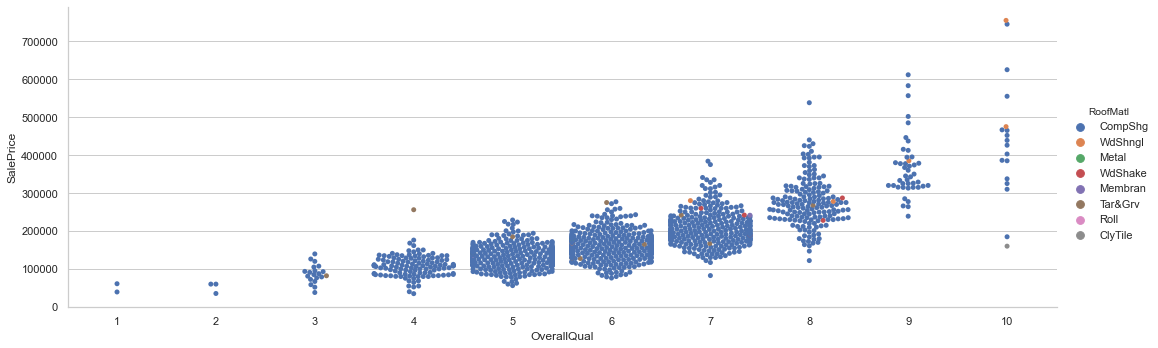

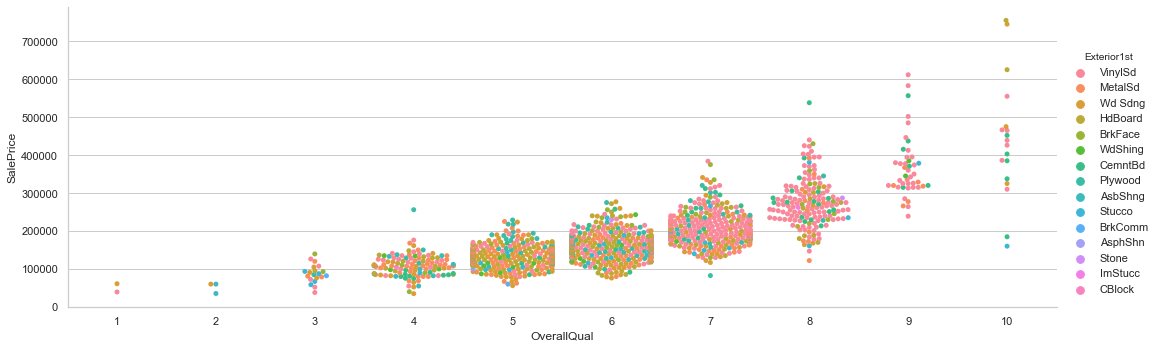

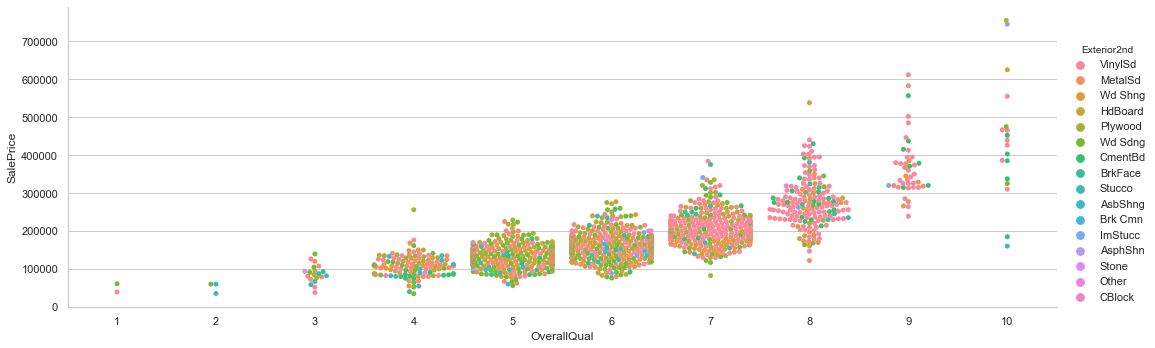

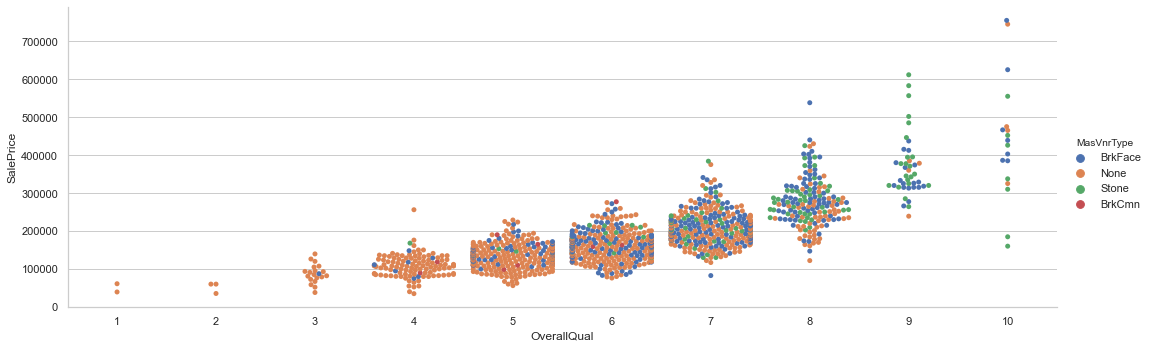

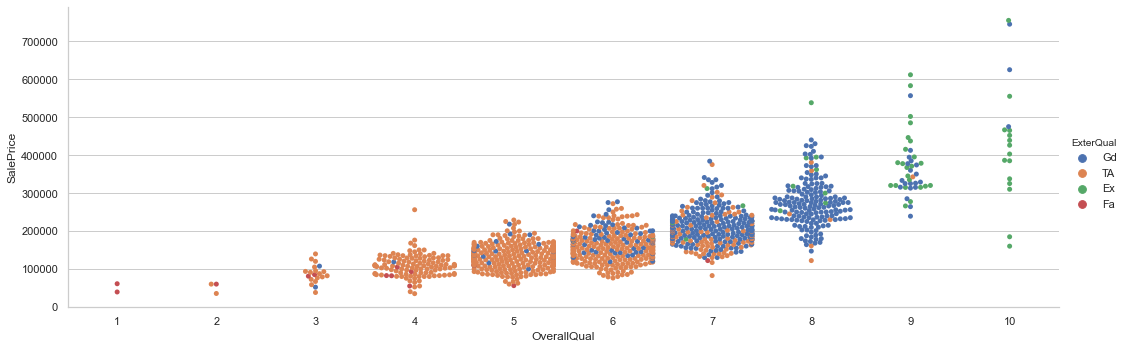

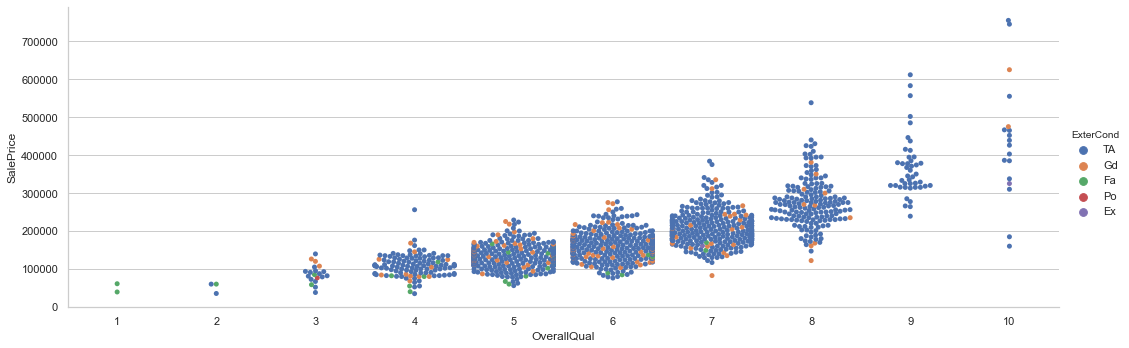

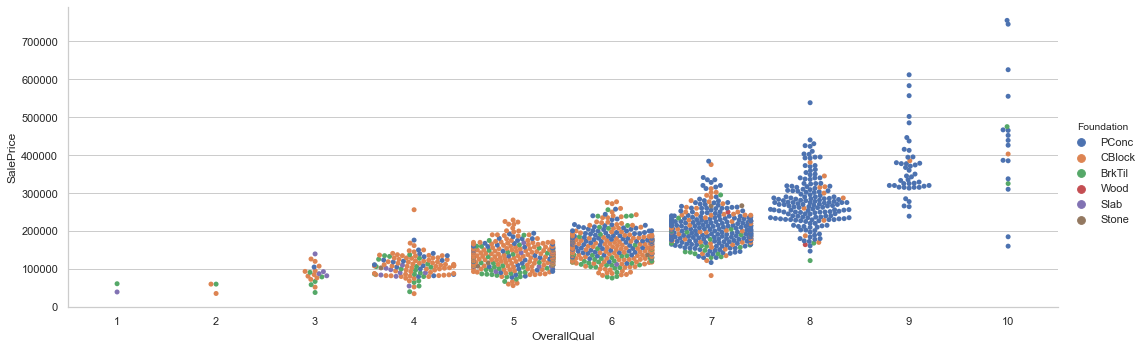

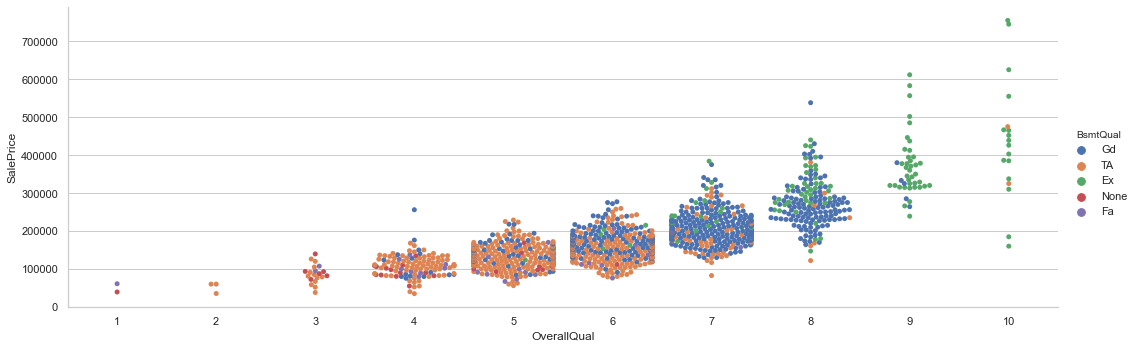

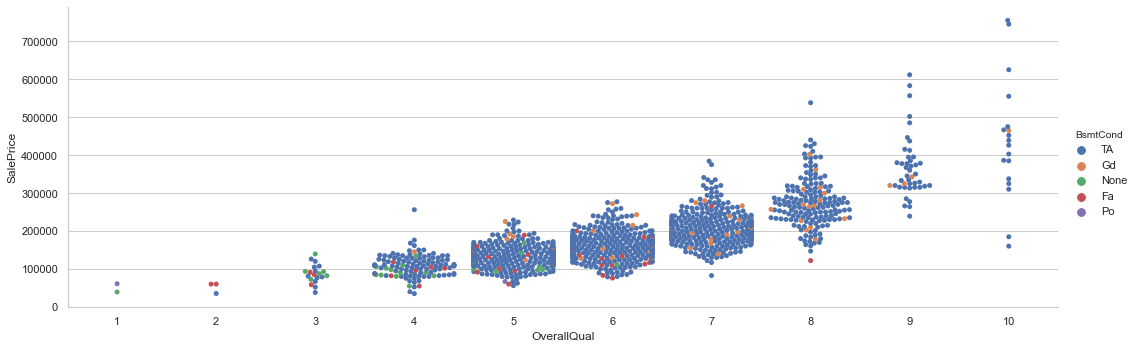

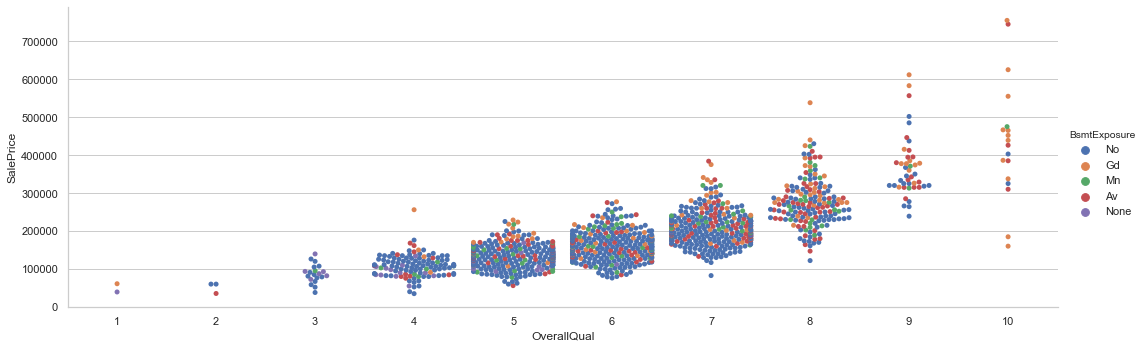

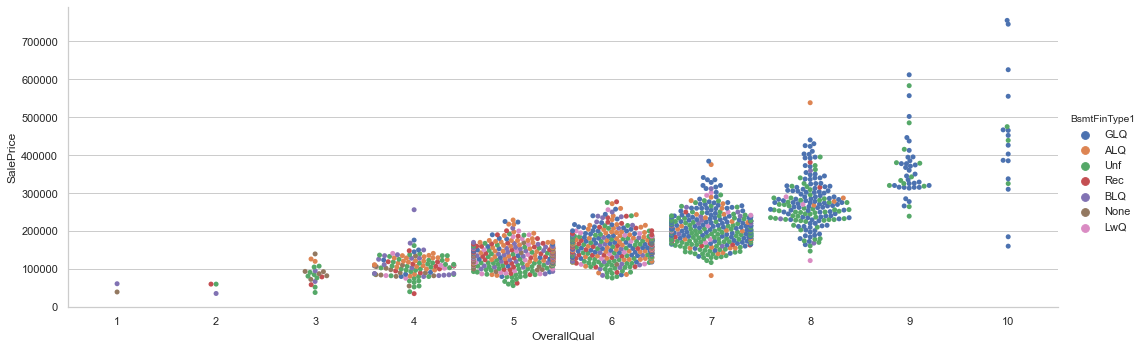

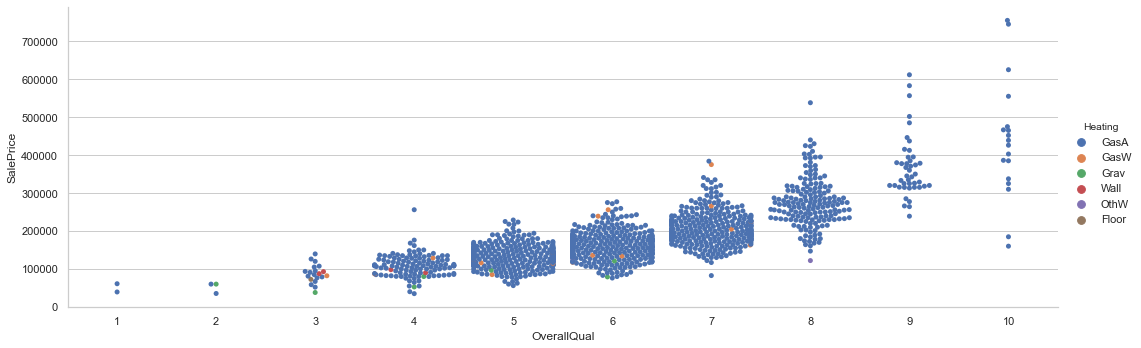

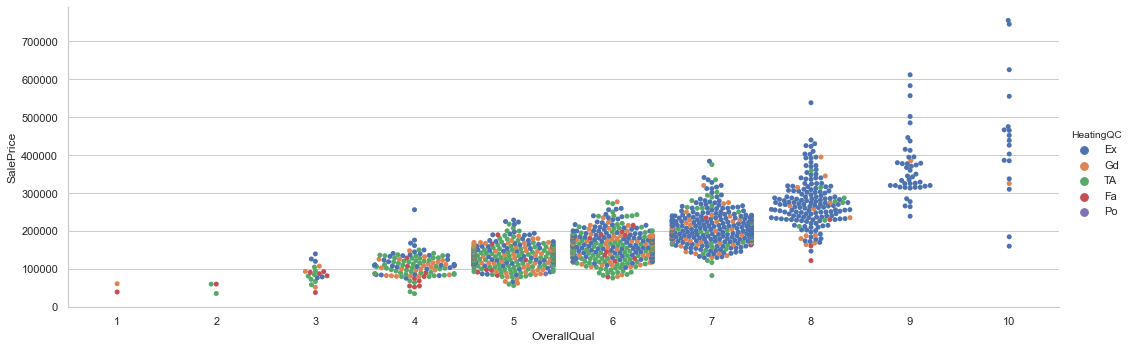

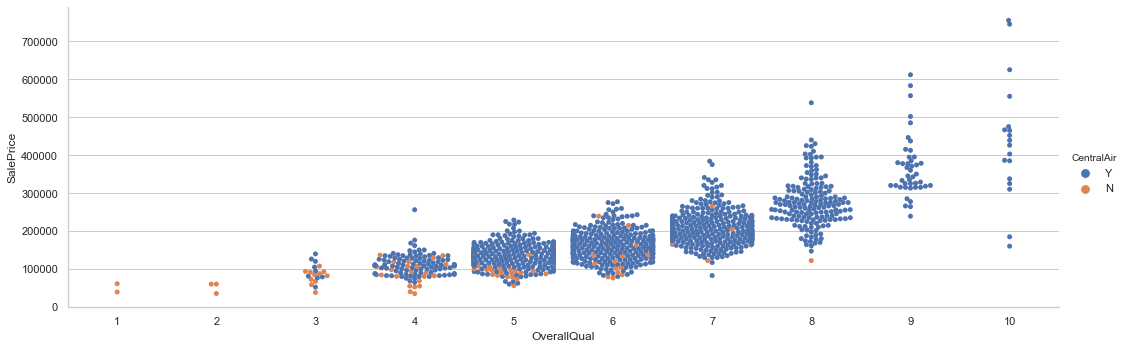

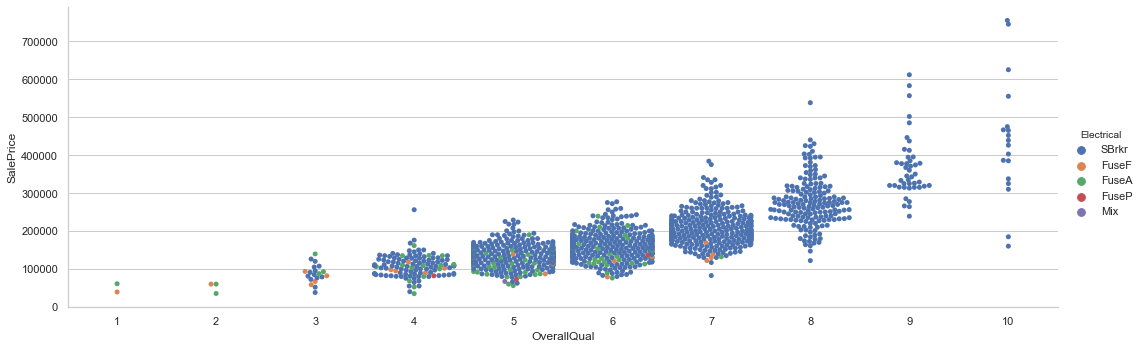

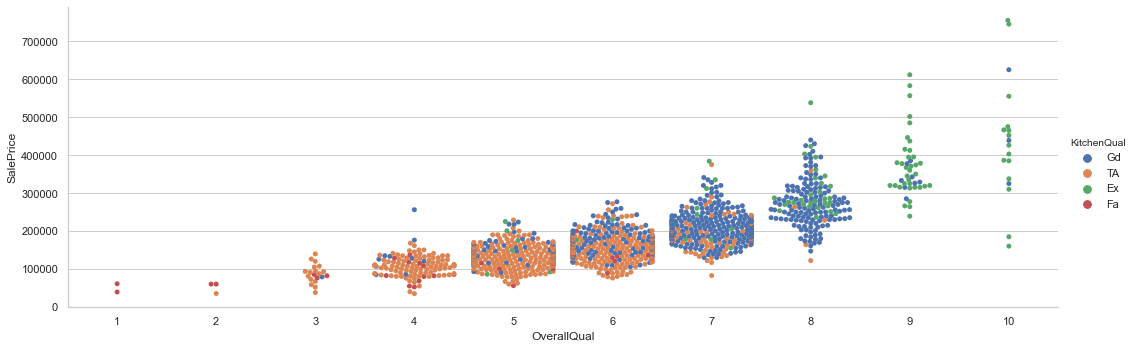

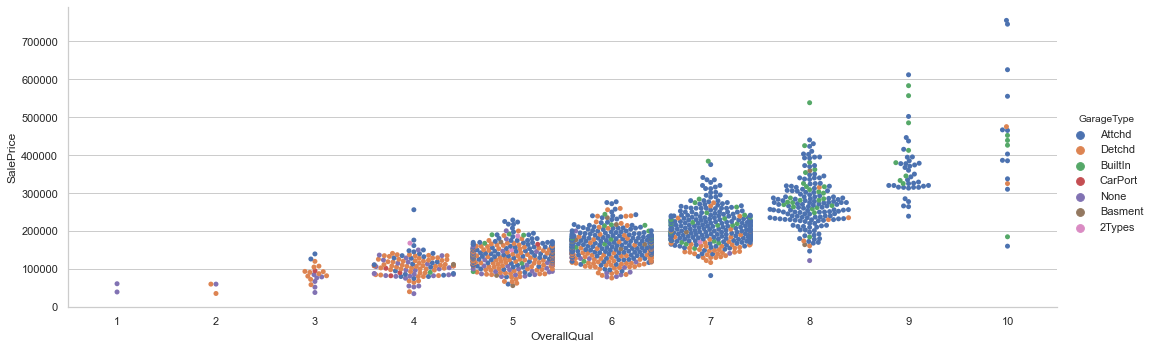

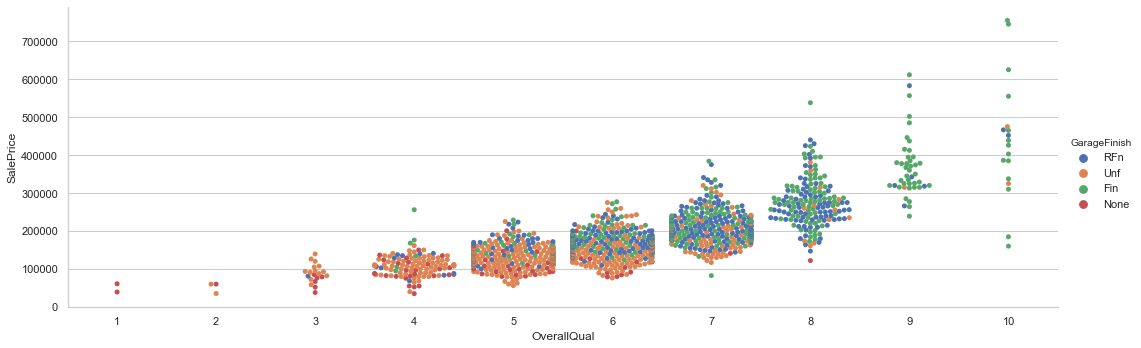

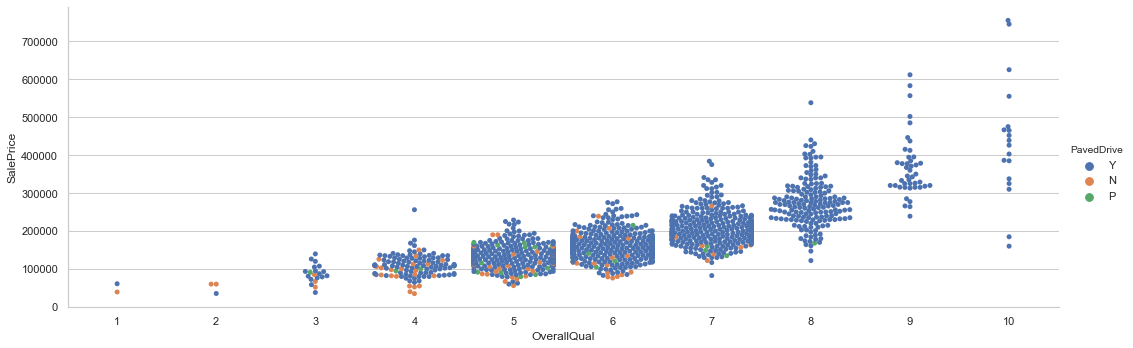

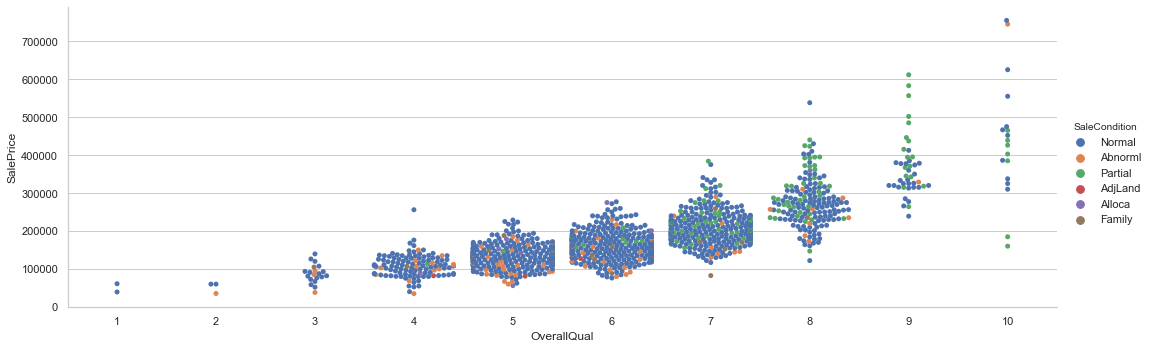

In [54]:
# farklilik olusturan kategorik degiskenler icin dongu
for category in differential_categories:
    sns.catplot(x="OverallQual", y="SalePrice", hue=category, data=house_prices_clean,
                kind="swarm", height=5, aspect=3 );

- Yukaridaki grafiklerden kalite belirten degiskenlerin- ```'ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC', 'Foundation'``` - farklilik olusturdugu gozlenebiliyor. Bu beklenen bir durum.
- ```col``` parametresi ile 3 boyutlu grafiklerimizi 4 uncu degisken icin degiskenin aldigi farkli deger sayisi kadar ayri ayri sutunlar olarak cizdirebiliriz.
- 4 degiskeni (2 surekli, 2 kategorik) ayni anda gormemizi saglayan ```catplot```

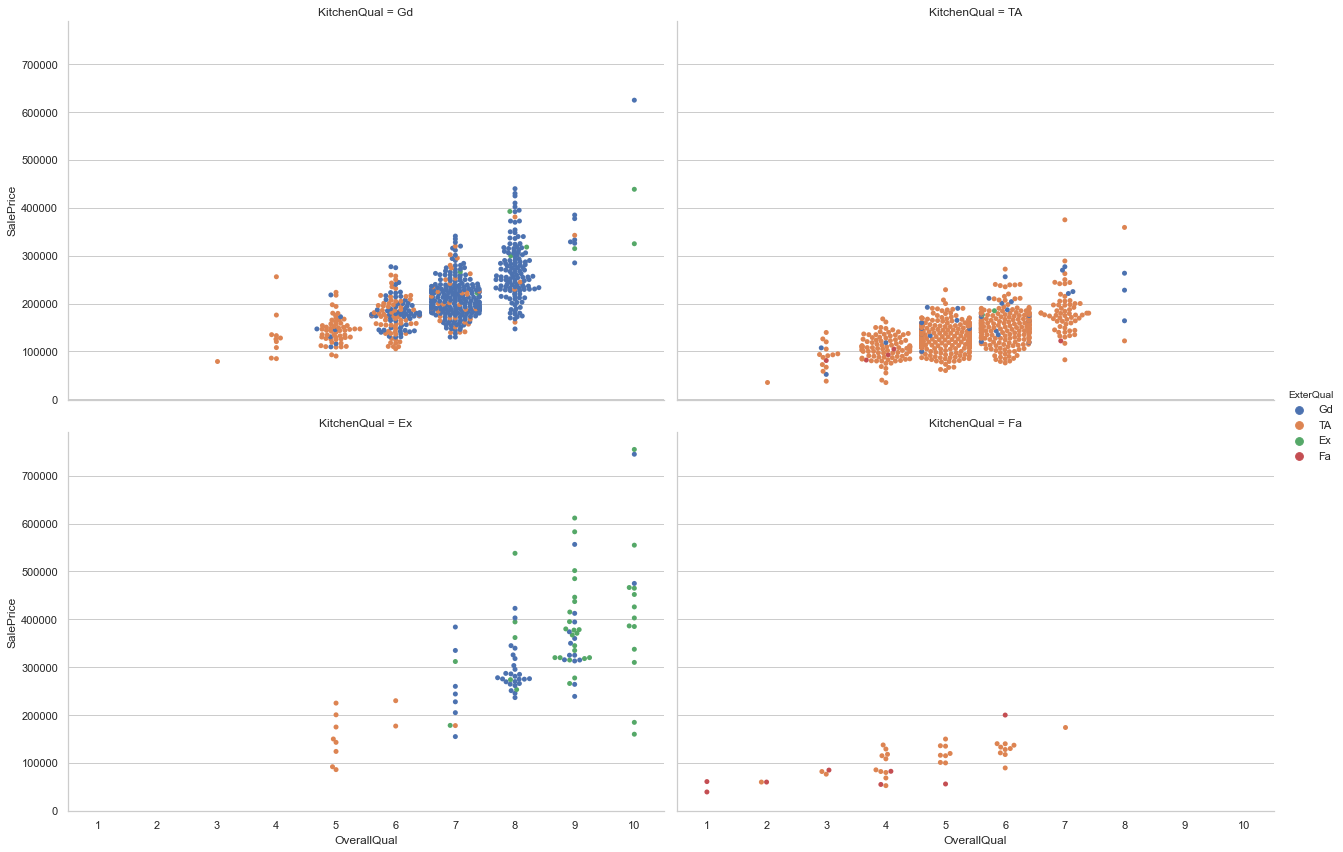

In [55]:
sns.catplot(x="OverallQual", y="SalePrice", hue='ExterQual', col='KitchenQual', col_wrap=2, 
            data=house_prices_clean, kind="swarm", height=6, aspect=1.5 );

---
## ***Ozellik Muhendisligi***


***Temel Bilesenler Analizi (Principal Components Analysis - PCA)***

- Temel bilesen(ler)i belirleme
- Temel bilesen(ler)in hedef degiskenle korelasyonunu inceleme

***Temel bilesenleri belirleme***

In [56]:
# hedef degiskeni surekli degiskenlerden cikardik
quantitative.remove('SalePrice')

- Ozvektorler ve ozdegerler belirlenir.

In [57]:
### covariance matrix
# dataframe den gerekli sutunlar alinir (surekli degerler)
house_prices_pca = house_prices_clean[quantitative]

# veriler X matrisine aktarilir
X = StandardScaler().fit_transform(house_prices_pca)

# X in transpozu alinir
Xt = X.T

# covariance matrisi hesaplanir
Cx = np.cov(Xt)
#print('Kovaryans matrisi :\n', Cx)

### eigenvectors and eigenvalues
# covariance matrisinden ozvektorler ve ozdegerler hesaplanir
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

- Scree grafigi cizilir.

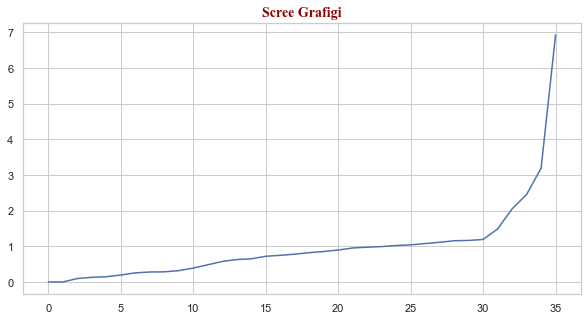

Ozdegerler Matrisi:
[-5.34425325e-17  5.64373198e-16  9.52601789e-02  1.29667111e-01
  1.46668151e-01  1.93755067e-01  2.54615322e-01  2.78930270e-01
  2.83851696e-01  3.17015381e-01  3.88612034e-01  4.80226143e-01
  5.74555104e-01  6.27856175e-01  6.47687427e-01  7.19766923e-01
  7.46645020e-01  7.78436351e-01  8.21249794e-01  8.53571501e-01
  8.95370365e-01  9.52359894e-01  9.74817547e-01  9.91411915e-01
  1.02142696e+00  1.04048970e+00  1.07631172e+00  1.11285666e+00
  1.15557721e+00  1.16371277e+00  1.19208155e+00  1.48604938e+00
  2.05040118e+00  2.45300049e+00  3.19104674e+00  6.92939069e+00]


In [58]:
plt.figure(figsize=(10,5))
plt.title('Scree Grafigi', fontdict=title_font)
plt.plot(np.sort(eig_val_cov))

plt.show()
print('Ozdegerler Matrisi:')
print(np.sort(eig_val_cov))

- Kayşat grafiği ve özdeğerler > 1 kuralı, ilk 5 bileşeni tutmamız gerektiği konusunda hemfikirdir. 
- Yeni bileşenlerimizin eski değişkenlerimizle ne kadar iyi korelasyon gösterdiğine bakalim.
    - Oncelikle temel bilesen olusturulmali bunu scikit-learn'deki PCA fonksiyonunu kullanarak yapabiliriz.

Veri kümesindeki toplam varyans yüzdesi:
 [0.19235124 0.08857947 0.06809223 0.05691658 0.04125088 0.0330907
 0.03230321 0.03207738 0.03089151 0.02987707 0.0288827  0.02835354
 0.02752036 0.02705972 0.02643632 0.02485436 0.02369408 0.02279687
 0.02160842 0.02072593 0.01997983 0.01797899 0.0174285  0.01594893
 0.01333048 0.01078739 0.00879995 0.00787937 0.00774276 0.0070678
 0.0053784  0.00407132]


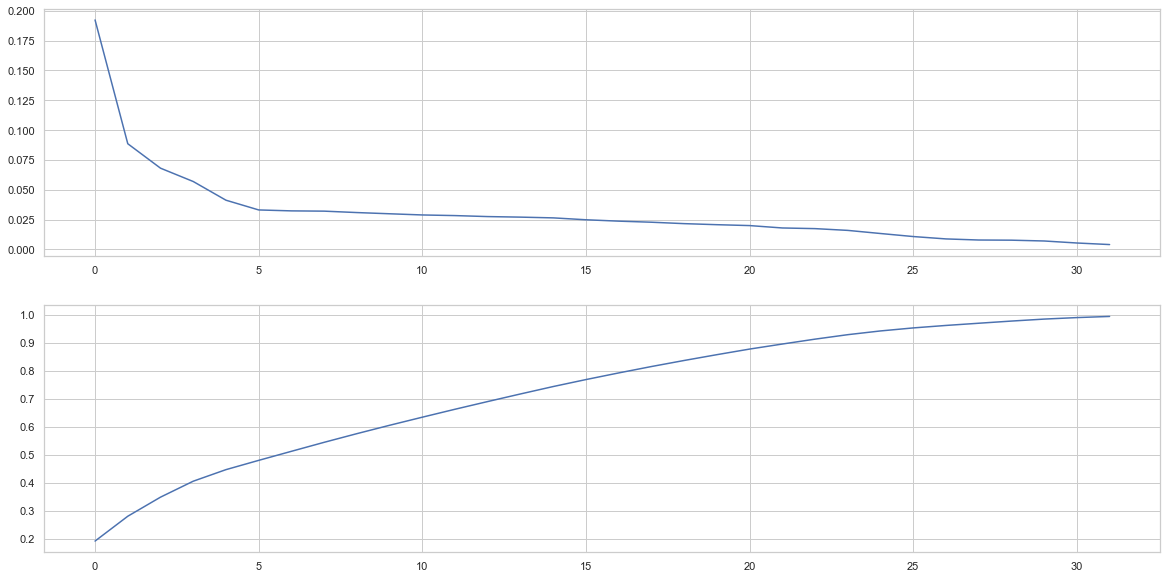

In [59]:
# sklearn yontemi
# kac bilesen seciyorsak PCA metoduna parametre olarak giriyoruz
# ya da aciklanabilecek varyans yuzdesi paramatre olarak girilebilir
# sklearn_pca = PCA(n_components=70)
sklearn_pca = PCA(n_components=0.99)
Y_sklearn = sklearn_pca.fit_transform(X)
print('Veri kümesindeki toplam varyans yüzdesi:\n',sklearn_pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.subplot(212)
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.show()

- Dizinin elemanlarini toplarsak 

In [60]:
sklearn_pca.explained_variance_ratio_.sum()

0.9937562991652369

- Temel Bileşenler Analizi (PCA) uygulandiktan sonra toplam varyansın %44'u ilk 5 bileşen tarafından açıklanabilmektedir. Bu yeterli bir oran degildir.

***Temel bilesenlerin hedef degiskenle korelasyonu***

- Oncelikle temel bilesenimizi dataframe e ekleriz
- Daha sonra korelasyon grafigini inceleriz

In [61]:
# degiskenlere erisim testi, matristen 0,1,2,3,4 uncu sutunlar tek tek alinacak
Y_sklearn[:,0]

array([ 1.50605573, -0.07164597,  1.68192   , ...,  0.61792647,
       -2.81636016, -0.87397117])

In [62]:
# 5 sutun dataframe e eklenir, PC0...PC4
for i in range(5):
    house_prices_clean['PC'+str(i)] = Y_sklearn[:,i]

# korelasyon sutunlari belirlenir
corr_columns = ['PC' + str(i) for i in range(5)]
corr_columns.append('SalePrice')

# korele edilecek veriler
house_prices_clean[corr_columns]

PC0                PC1                PC2  \
0     1.506055730311441  0.387436264277654 -1.542001301418991   
1    -0.071645973177244 -1.049917999966663  1.290431321573264   
2     1.681919999047889  0.261273911966002 -1.338408651913045   
3    -0.334514703180893  1.066230533073055  1.059009807196102   
4     4.411974366472185  1.079788282675331 -0.386595500881522   
...                 ...                ...                ...   
1455  0.889630531269073  1.388432147183939 -1.927330602290932   
1456  2.301316092683109 -1.779529810691977  2.311500320210139   
1457  0.617926468718547  3.272193904050649  1.814595021236156   
1458 -2.816360161004268 -1.985593090516284  2.062603652618503   
1459 -0.873971167722284 -1.509481763875300  1.645876186271086   

                    PC3                PC4  SalePrice  
0    -1.888405667727573  0.686381177123397     208500  
1     0.055956151930807 -1.734192764636028     181500  
2    -1.350537952460491 -0.053384167108796     223500  
3    -0.017279835810588  0.450801048593476     140000  
4    -1.325973351686594 -0.064451426714566     250000  
...                 ...                ...        ...  
1455  0.448449177668324 -0.525670960130560     175000  
1456  0.283442671212181  0.433665293012971     210000  
1457 -0.048618812330734 -1.540246103988007     266500  
1458 -0.867881931722576 -0.405428366007407     142125  
1459 -1.690143600339374 -0.170463815005714     147500  

[1460 rows x 6 columns]

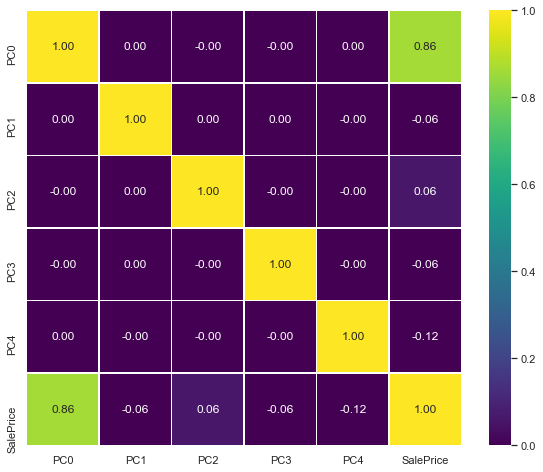

In [63]:
# korelasyon hesaplama
pca_corr = house_prices_clean[corr_columns].corr()


# korelasyon grafigi cizilir
plt.figure(figsize=(10,8))
sns.heatmap(pca_corr,  square=True, annot=True,fmt='.2f', linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.show()

- ```PC0``` degiskeninin ```SalePrice``` ile korelasyonu $0.86$ cikti, ama diger degiskenlerle korelasyonu cok dusuk.
- Buradaki korelasyon bize cok bisey ifade etmez.

***Bilesenleri Donusturme***

In [64]:
house_prices_clean.replace(to_replace='NoRidge', value='elite_neighboorhood', inplace=True)

In [65]:
house_prices_clean['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'elite_neighboorhood', 'Mitchel',
       'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt',
       'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber',
       'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale',
       'SWISU', 'Blueste'], dtype=object)

- ```Neighborhood``` degiskeninde gozle gorulur farklilik gosteren 3 mahalleyi ```['NoRidge': 'Northridge', 'NridgHt': 'Northridge Heights',  'StoneBr': 'Stone Brook']``` ayri diger mahalleri ayri olarak tutup bircok farkli deger tutmaktansa iki deger tutacagiz ve bunun ```SalePrice``` uzerine etkisini inceleyecegiz.

In [66]:
# belirgin sekilde en yuksek fiyat ozelligi gosteren neighborhood degerleri
elite_neighboorhood = ['NoRidge', 'NridgHt',  'StoneBr']
# list compherension ile diger mahalleleri ayri listeye alma
other_neighboorhood = [val for val in  house_prices_clean['Neighborhood'].unique() if val not in elite_neighboorhood]

In [67]:
# degisiklikleri farkli bir df de yapalim
house_prices_ne = house_prices_clean.copy()

In [68]:
# replace ile elite neighboorhood degerlerini tek bir degere donusturme
for val in elite_neighboorhood:
    house_prices_ne['Neighborhood'].replace(to_replace=val, value=1, inplace=True)

# replace ile other neighboorhood degerlerini tek bir degere donusturme
for val in other_neighboorhood:
    house_prices_ne['Neighborhood'].replace(to_replace=val, value=0, inplace=True)
    
# veri tipi boolean olarak degistirildi
house_prices_ne['Neighborhood'] = house_prices_ne['Neighborhood'].astype('boolean')

# sutun adi degistirildi
house_prices_ne.rename(columns={'Neighborhood': 'elite_neighborhood'}, inplace=True)

- Donusturulen degiskenin SalePrice uzerindeki etkisi gozlemlenebilir.

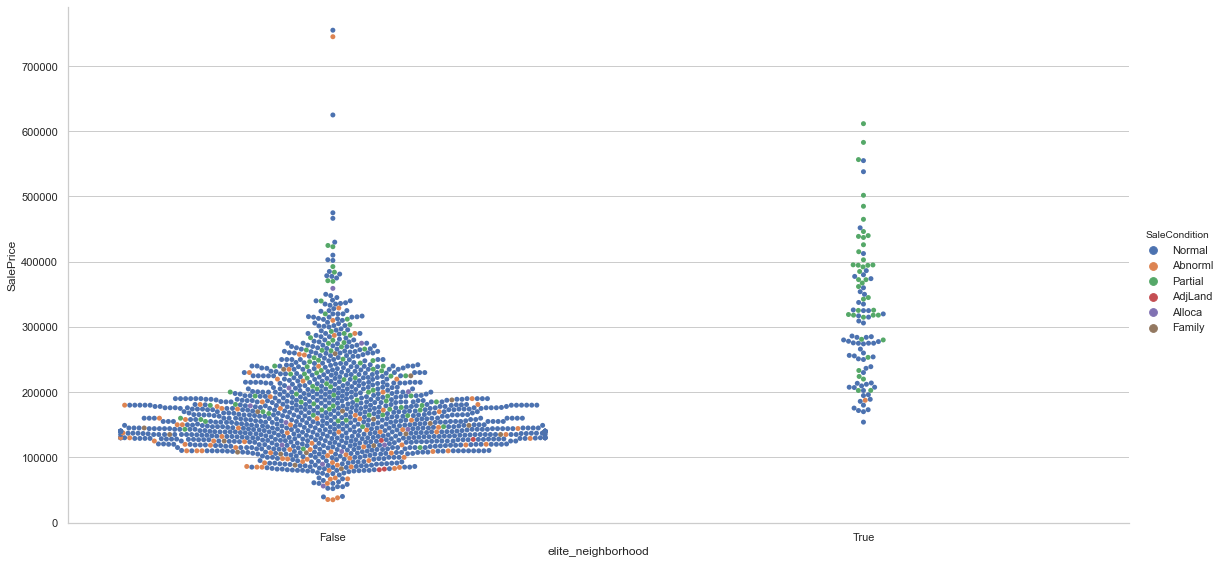

In [69]:
g = sns.catplot(x='elite_neighborhood', y='SalePrice', hue='SaleCondition', data=house_prices_ne, 
                kind='swarm', height=8, aspect=2)

- Elit bolgedeki evlerin fiyatlari 150 bin den baslarken, diger bolgedeki evlerin en yogun oldugu fiyat araligi 150 bin.
- Ayni grafigi box plot olarak da cizdirip outlier tespiti yapilabilir.

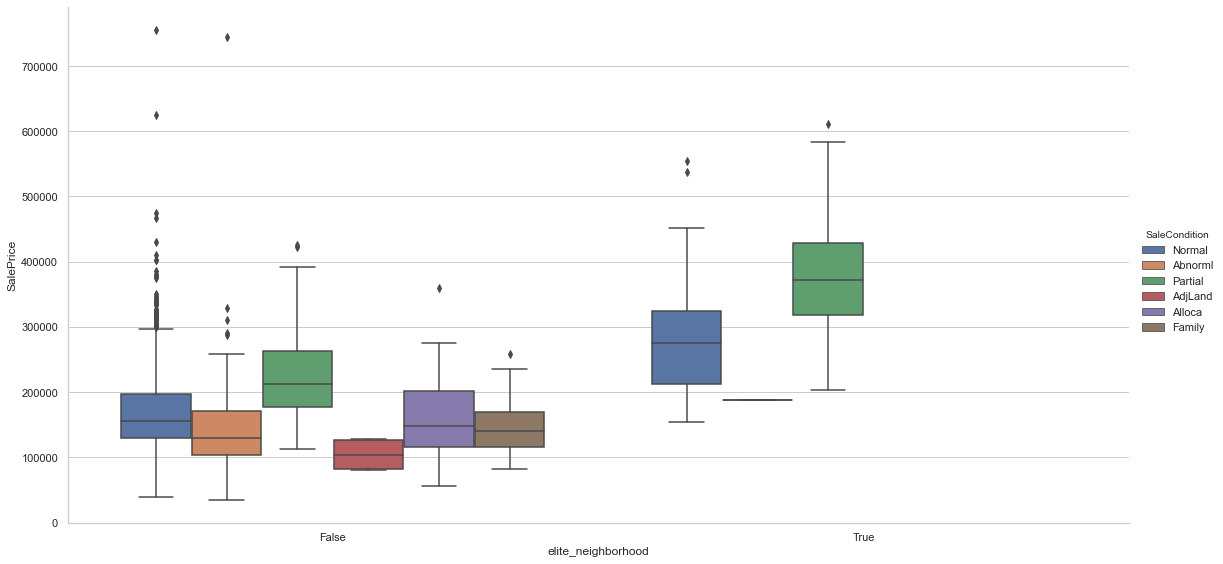

In [70]:
g = sns.catplot(x='elite_neighborhood', y='SalePrice', hue='SaleCondition', data=house_prices_ne, 
                kind='box', height=8, aspect=2)

- Boxplot da SaleCondition degiskenlerinin etkisini daha net gorebildik. Burada elite bolgede olmayip Partial(yeni) olan evler de elit bolge kategorisinde degerlendirilebilir.

***Kategorik Bilesenleri Encode Etme***

- Kategorik degiskenleri encode ederken groupby metodu ile degiskenin degerlerinin SalePrice ortalamalarina gore degerler 1 den baslayarak siralandi(puanlandi).
- Mesela ExterQual icin: {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

In [71]:
def encode(df, feature):
    ordering = pd.DataFrame()
    ordering['val'] = df[feature].unique()
    # degerler index yapildi
    ordering.index = ordering.val
    # degisken degerlerinin SalePrice ortalamalarini aliyor
    ordering['spmean'] = df[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # ortalamalari siraliyor
    ordering = ordering.sort_values('spmean')
    # siralama degerleri ayri bir sutunda
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    #print(ordering)
    ordering = ordering['ordering'].to_dict()    
    # en son soyle bir sozluk olusur ExterQual icin
    # {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
    
    # burasi cok ilginc yeni encoded degiskeni burada olusturuyor
    for cat, o in ordering.items():        
        df.loc[df[feature] == cat, feature+'_E'] = o
  

In [72]:
qual_encoded = []
for q in qualitative:  
    encode(house_prices_clean, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


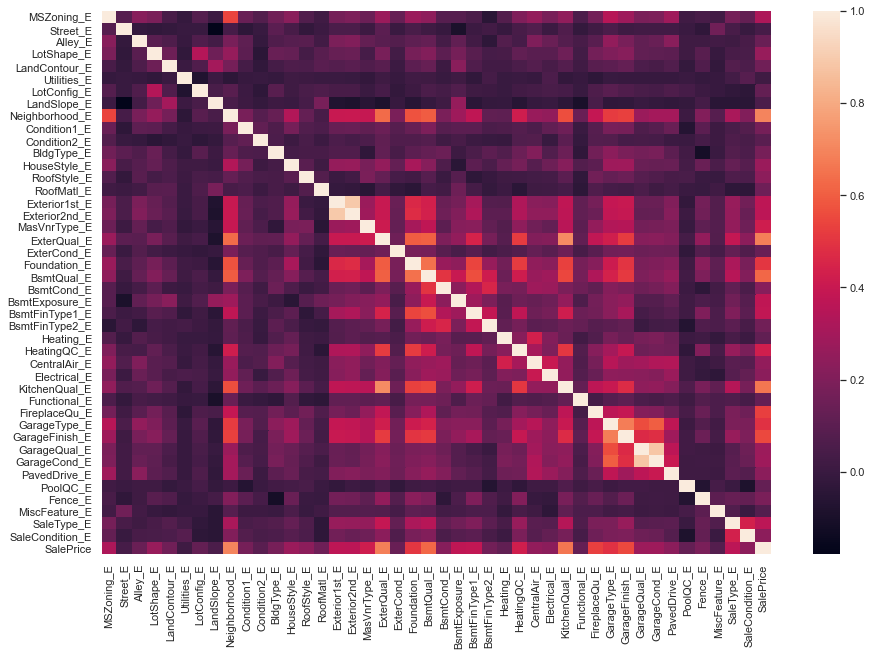

In [73]:
# korelasyon grafigi cizilir
corr_matrix = house_prices_clean[qual_encoded+['SalePrice']].corr()
plt.figure(figsize=(15,10))
x = sns.heatmap(corr_matrix)

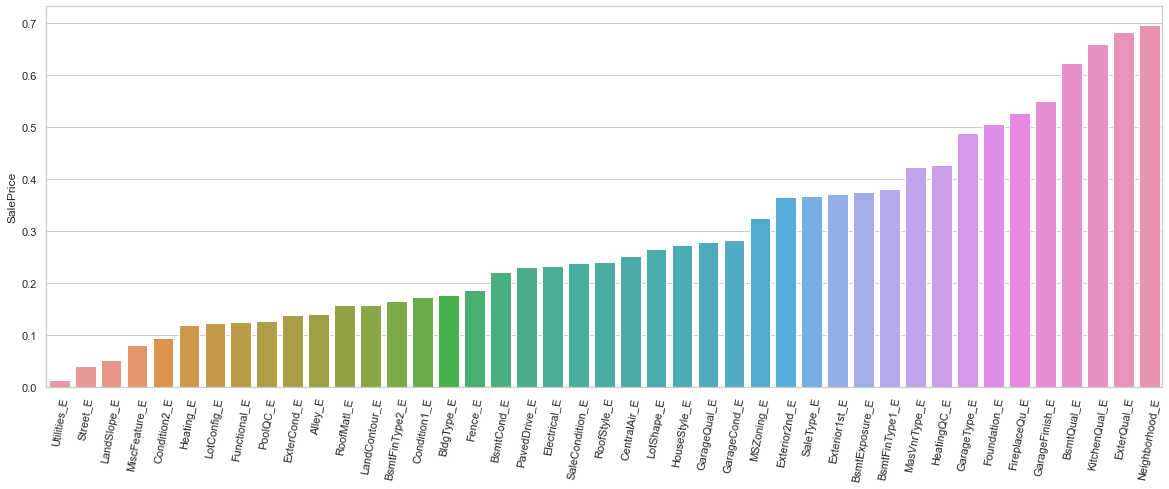

In [74]:
# sadece hedef degiskenin oldugu bolumu matristen aldik
sale_price_corr = corr_matrix['SalePrice'].sort_values()
# hedef degiskenimizi (SalePrice) cikardik
sale_price_corr.drop('SalePrice', inplace= True)

plt.figure(figsize=(20,7))
#plt.bar(x=sale_price_corr.index, height=sale_price_corr)
sns.barplot(x=sale_price_corr.index, y=sale_price_corr)
plt.xticks(rotation=80)
plt.show()

***Encode edilmis kategorik degiskenlerin de dahil oldugu PCA***

In [75]:
### covariance matrix
# dataframe den gerekli sutunlar alinir (surekli ve encode edilmis degerler)
house_prices_pca = house_prices_clean[quantitative+qual_encoded]

# veriler X matrisine aktarilir
X = StandardScaler().fit_transform(house_prices_pca)

# X in transpozu alinir
Xt = X.T

# covariance matrisi hesaplanir
Cx = np.cov(Xt)
#print('Kovaryans matrisi :\n', Cx)

### eigenvectors and eigenvalues
# covariance matrisinden ozvektorler ve ozdegerler hesaplanir
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

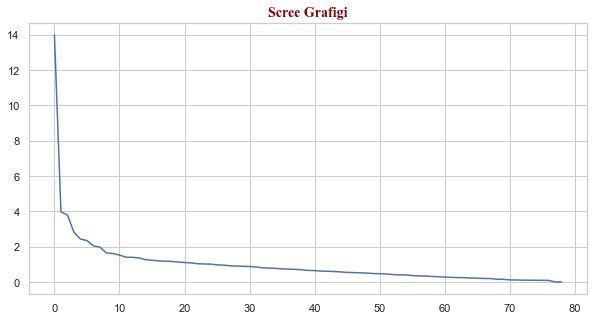

Ozdegerler Matrisi:
[ 1.39811925e+01  3.97287717e+00  3.79183996e+00  2.81009186e+00
  2.42650855e+00  2.34332559e+00  2.04399544e+00  1.96847489e+00
  1.63450724e+00  1.60987033e+00  1.51974354e+00  1.39974075e+00
  1.39446917e+00  1.35762215e+00  1.25881569e+00  1.22516721e+00
  1.19509545e+00  1.17613831e+00  1.15801806e+00  1.12698533e+00
  1.09890710e+00  1.07773329e+00  1.03138285e+00  1.01689210e+00
  1.00817148e+00  9.66209151e-01  9.54610563e-01  9.11967389e-01
  9.02246263e-01  8.85345404e-01  8.74830151e-01  8.44744797e-01
  7.98864639e-01  7.84634454e-01  7.67877238e-01  7.38508531e-01
  7.26894576e-01  7.13767040e-01  6.88053872e-01  6.55474644e-01
  6.41906706e-01  6.15180967e-01  6.05357937e-01  5.90913796e-01
  5.67331049e-01  5.40750776e-01  5.27956716e-01  5.15755916e-01
  5.03738788e-01  4.76161385e-01  4.64020168e-01  4.51846123e-01
  4.17731598e-01  4.00686944e-01  3.98648811e-01  3.61813863e-01
  3.42993587e-01  3.34728616e-01  3.12355385e-01  2.98139634e-01
  2.7

In [76]:
plt.figure(figsize=(10,5))
plt.title('Scree Grafigi', fontdict=title_font)
# buyukten kucuge siralamak icin
plt.plot(-np.sort(-eig_val_cov))

plt.show()
print('Ozdegerler Matrisi:')
print(-np.sort(-eig_val_cov))

Veri kümesindeki toplam varyans yüzdesi:
 [0.1768559  0.05025514 0.0479651  0.03554642 0.03069426 0.02964203
 0.02585564 0.02490034 0.02067579 0.02036415 0.01922408 0.0177061
 0.01763942 0.01717332 0.01592346 0.01549782 0.01511743 0.01487763
 0.01464842 0.01425587 0.01390069 0.01363285 0.01304654 0.01286324
 0.01275292 0.01222212 0.0120754  0.01153598 0.01141302 0.01119923
 0.01106621 0.01068565 0.01010528 0.00992528 0.00971331]


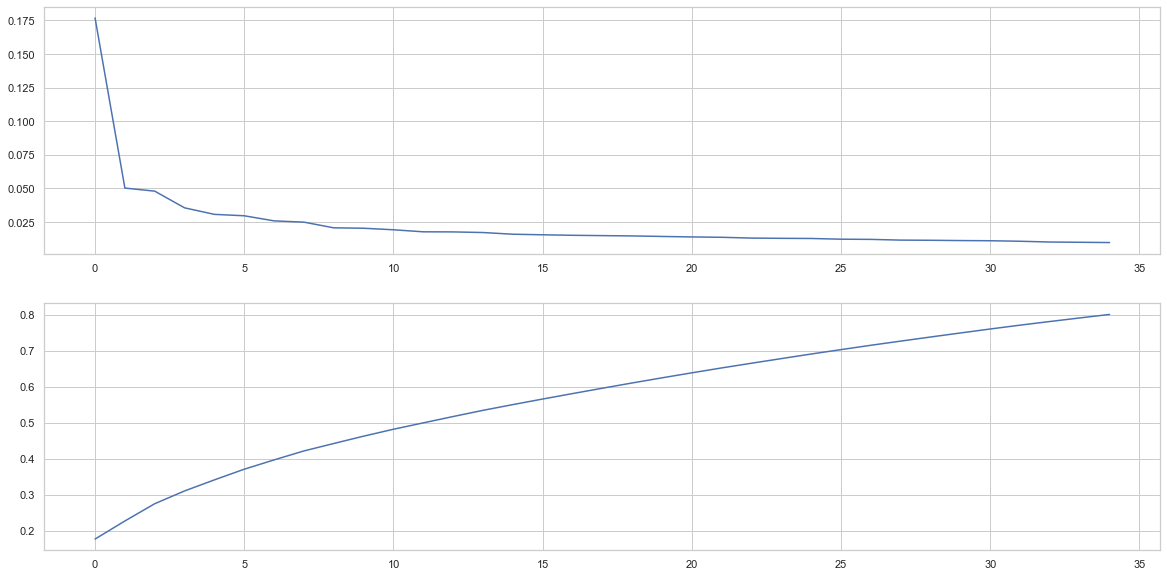

In [77]:
# sklearn yontemi
# aciklamak istedigimiz varyansin yuzdesini PCA metoduna parametre olarak giriyoruz
sklearn_pca = PCA(n_components=0.8)
Y_sklearn = sklearn_pca.fit_transform(X)
print('Veri kümesindeki toplam varyans yüzdesi:\n',sklearn_pca.explained_variance_ratio_)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(sklearn_pca.explained_variance_ratio_)
plt.subplot(212)
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.show()

- Toplam varyansin %80 ini aciklamak icin en az 35 degiskene ihtiyacimiz oldugu anlasiliyor.

In [78]:
len(qualitative+qual_encoded)

86

- Toplam 86 degiskenden 35 temel bilesene dusurmek cok da faydali olmayacaktir.